#Initialization


In [1]:
#Initialization
#Mount the Google Drive to Google Colab
from google.colab import drive
import os

drive.mount('/content/drive')

os.chdir("/content/drive/My Drive/Data Mining project/Data/")
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
pp5i_test.gr.csv       pp5i_train_class.txt	SVM_finalized_model.gsheet
pp5i_test.gr.gsheet    pp5i_train.gr.csv	SVM_finalized_model.sav
pp5i_train_class.gdoc  SVM_finalized_model.csv


In [2]:
#Functions
def plotRocCurve(xtrain,ytrain,classifier):
  import matplotlib.pyplot as plt

  # AUC Curve
  y_pred_proba = classifier.predict_proba(X_train)[:,1]
  fpr, tpr, thresholds = metrics.roc_curve(Y_train,y_pred_proba) 
  auc = metrics.roc_auc_score(Y_train, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
  plt.legend(loc="lower right")
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic (ROC) ')
  plt.show()

  print('\nArea under ROC curve is (AUC) :',str(format(auc,'.6f') ))

# 1.Prepare Problem

In [3]:
#Prepare Problem
# a) Load libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
from pandas.plotting import scatter_matrix
##############################################################################
import numpy as np
 # b) Load dataset // Load Machine Learning Data
data = pd.read_csv('pp5i_test.gr.csv')
#data = pd.read_csv('pp5i_train.gr.csv')
data_to_use = data
data_to_use

,SNO,S101,S102,S103,S104,S105,S106,S107,S108,S109,S110,S111,S112,S113,S114,S115,S116,S117,S118,S119,S120,S121,S122,S123
0,A28102_at,58,52,13,46,48,31,16,23,47,42,46,28,25,11,19,18,70,50,29,47,44,56,119
1,AB000114_at,36,34,32,30,22,57,17,19,29,14,20,32,19,17,57,25,50,36,26,28,34,45,53
2,AB000115_at,10,255,0,14,17,-6,15,17,33,22,41,12,13,18,-2,-7,148,145,13,361,16,7,34
3,AB000220_at,64,19,133,62,110,77,22,33,132,18,30,32,465,84,34,30,69,108,75,184,57,26,83
4,AB000409_at,17,220,186,232,169,251,210,142,131,113,170,252,135,209,166,260,241,165,111,170,147,246,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,X83863_at,288,161,400,206,171,257,216,155,284,234,303,506,95,164,494,197,277,147,113,136,157,176,198
7066,Z17240_at,74,33,36,44,42,43,23,51,35,32,51,55,32,39,104,40,31,44,39,55,48,62,37
7067,L49218_f_at,5,6,-24,13,8,9,7,8,6,4,7,9,6,4,7,17,-24,14,-13,10,11,3,-7
7068,M71243_f_at,61,22,55,51,16,82,48,34,24,23,28,39,23,37,36,62,27,24,-1,41,34,55,60


# 2.Summarize Data


**********************************************************************************************
## 2.A Understand the Data
**********************************************************************************************
We must understand the data in order to get the best results. We will discover 7 recipes that we can use in Python to better understand our machine learning data. 
1. Take a peek at our raw data.
2. Review the dimensions of our dataset.
3. Review the data types of attributes in our data.
4. Summarize the distribution of instances across classes in our dataset.
5. Summarize our data using descriptive statistics.
6. Understand the relationships in our data using correlations.
7. Review the skew of the distributions of each attribute.

2.A.1. Peek at our Data

In [4]:
#2.A.1. Peek at our Data
#review the first 20 rows
peek = data_to_use.head(20)
peek
# We can confirm that the scales for the attributes are all over the place 
# because of the differing units. We may benefit from some transforms later on.

,SNO,S101,S102,S103,S104,S105,S106,S107,S108,S109,S110,S111,S112,S113,S114,S115,S116,S117,S118,S119,S120,S121,S122,S123
0,A28102_at,58,52,13,46,48,31,16,23,47,42,46,28,25,11,19,18,70,50,29,47,44,56,119
1,AB000114_at,36,34,32,30,22,57,17,19,29,14,20,32,19,17,57,25,50,36,26,28,34,45,53
2,AB000115_at,10,255,0,14,17,-6,15,17,33,22,41,12,13,18,-2,-7,148,145,13,361,16,7,34
3,AB000220_at,64,19,133,62,110,77,22,33,132,18,30,32,465,84,34,30,69,108,75,184,57,26,83
4,AB000409_at,17,220,186,232,169,251,210,142,131,113,170,252,135,209,166,260,241,165,111,170,147,246,204
5,AB000449_at,8,28,-6,-1,21,-1,19,27,17,8,11,30,200,14,0,4,13,15,69,5,8,4,3
6,AB000450_at,-36,3,-58,-29,-2,-87,4,-14,-5,0,21,-77,21,-39,-46,-31,26,18,-7,15,5,-19,-23
7,AB000460_at,222,209,174,188,158,210,174,144,167,140,175,206,159,244,182,157,238,169,181,188,236,240,157
8,AB000462_at,119,93,66,62,42,179,124,36,44,36,41,41,37,85,52,185,136,35,45,76,71,77,106
9,AB000464_at,254,143,204,162,59,339,183,106,100,104,111,279,90,212,184,247,135,84,109,127,126,206,225


2.A.2.Dimensions of Our Data

In [5]:
#2.A.2.Dimensions of Our Data
print(data_to_use.shape)

(7070, 24)


2.A.3.Data Type For Each Attribute

In [6]:
#2.A.3.Data Type For Each Attribute
types = data_to_use.dtypes
print(types)

# We can see that all of the attributes are numeric of integers (int) type

SNO     object
S101     int64
S102     int64
S103     int64
S104     int64
S105     int64
S106     int64
S107     int64
S108     int64
S109     int64
S110     int64
S111     int64
S112     int64
S113     int64
S114     int64
S115     int64
S116     int64
S117     int64
S118     int64
S119     int64
S120     int64
S121     int64
S122     int64
S123     int64
dtype: object


2.A.4.Descriptive Statistics

In [7]:
#2.A.4.Descriptive Statistics
# Descriptive statistics can give us great insight into the shape of each attribute. Often we can
# create more summaries than we have time to review. The describe() function on the Pandas
# DataFrame lists 8 statistical properties of each attribute. They are:
#  Count.
#  Mean.
#  Standard Deviation.
#  Minimum Value.
#  25th Percentile.
#  50th Percentile (Median).
#  75th Percentile.
#  Maximum Value.

pd.set_option('display.width', 100)
# pd.set_option('precision', 3)
description = data_to_use.describe()
description

# We now have a better feeling for how different the attributes are. The min and max values
# as well as the means vary a lot. We are likely going to get better results by rescaling the data
# in some way.

# Data has interestingly differing mean values.
# There may be some benefit from standardizing the data.

,S101,S102,S103,S104,S105,S106,S107,S108,S109,S110,S111,S112,S113,S114,S115,S116,S117,S118,S119,S120,S121,S122,S123
count,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000
mean,104.988260,111.238190,107.022772,107.794908,112.914003,98.474823,121.480481,114.247100,123.031542,113.841443,116.967044,98.081895,124.429279,110.846535,122.904809,111.281895,114.314144,119.051627,126.450354,127.106365,126.086139,103.245969,112.930693
std,165.468105,180.155248,351.936647,206.391028,176.444904,185.528242,266.718019,188.193502,211.282094,172.090327,186.462815,179.755739,231.546238,229.580598,386.633069,253.748116,225.007238,199.785665,246.443709,239.314541,240.204296,181.283917,212.457088
min,-633.000000,-309.000000,-5188.000000,-405.000000,-299.000000,-846.000000,-501.000000,-198.000000,-184.000000,-155.000000,-167.000000,-1461.000000,-196.000000,-432.000000,-3178.000000,-703.000000,-446.000000,-600.000000,-243.000000,-211.000000,-340.000000,-1035.000000,-276.000000
25%,18.000000,18.000000,9.000000,15.000000,19.000000,12.000000,17.000000,19.000000,21.000000,20.000000,21.000000,9.000000,17.000000,15.000000,8.000000,11.000000,19.000000,20.000000,15.000000,17.000000,20.000000,14.000000,15.000000
50%,58.000000,55.000000,46.000000,54.000000,59.000000,50.000000,56.000000,57.000000,58.000000,59.000000,59.000000,42.000000,54.000000,54.000000,45.000000,48.000000,57.000000,57.000000,50.000000,55.000000,56.000000,55.000000,52.000000
75%,134.000000,135.000000,126.000000,132.000000,136.000000,130.000000,135.000000,135.000000,138.000000,137.000000,138.000000,126.000000,134.000000,132.000000,125.000000,128.000000,136.000000,137.000000,133.000000,135.000000,137.000000,131.000000,132.000000
max,2776.000000,2864.000000,10452.000000,6659.000000,2833.000000,4017.000000,9042.000000,2782.000000,3213.000000,2395.000000,3439.000000,4127.000000,3574.000000,8641.000000,5203.000000,6975.000000,6063.000000,2672.000000,4155.000000,3054.000000,4478.000000,3632.000000,4435.000000


2.A.5.Class Distribution 

In [8]:
# 2.A.5.Class Distribution 
class_counts = data_to_use.groupby('SNO').size()
print(class_counts)

# We can see that the classes are reasonably balanced between output values.

SNO
A28102_at         1
AB000114_at       1
AB000115_at       1
AB000220_at       1
AB000381_s_at     1
                 ..
Z94753_s_at       1
Z95624_at         1
Z96810_at         1
Z97054_xpt2_at    1
Z97074_at         1
Length: 7070, dtype: int64


*2*.A.6.Correlations Between Attributes

In [9]:
# Pairwise Pearson correlations
correlations = data_to_use.corr(method='pearson')
correlations

# This is interesting. We can see that many of the attributes have a weak correlation

,S101,S102,S103,S104,S105,S106,S107,S108,S109,S110,S111,S112,S113,S114,S115,S116,S117,S118,S119,S120,S121,S122,S123
S101,1.000000,0.533586,0.485225,0.796152,0.493020,0.750883,0.724453,0.707945,0.505408,0.555236,0.531049,0.563747,0.484168,0.749069,0.505651,0.695423,0.785842,0.490312,0.607980,0.417317,0.655911,0.633639,0.699741
S102,0.533586,1.000000,0.239998,0.539642,0.792384,0.453271,0.575469,0.660957,0.766141,0.728098,0.737797,0.489391,0.712967,0.475732,0.315792,0.498518,0.588126,0.734172,0.640639,0.638258,0.674304,0.638200,0.634004
S103,0.485225,0.239998,1.000000,0.512980,0.232896,0.520952,0.458659,0.392675,0.226994,0.224603,0.204329,0.364372,0.199211,0.538600,0.545820,0.388123,0.409757,0.214824,0.303884,0.192896,0.302152,0.407257,0.380097
S104,0.796152,0.539642,0.512980,1.000000,0.525180,0.736271,0.832937,0.773813,0.542080,0.539297,0.504056,0.550463,0.573971,0.862818,0.525594,0.731227,0.721788,0.600810,0.740795,0.515994,0.704801,0.753539,0.723523
S105,0.493020,0.792384,0.232896,0.525180,1.000000,0.422326,0.519130,0.653695,0.777704,0.767921,0.728020,0.510561,0.727258,0.443893,0.303564,0.460759,0.522004,0.762996,0.638859,0.678126,0.634917,0.636241,0.582469
S106,0.750883,0.453271,0.520952,0.736271,0.422326,1.000000,0.732023,0.664492,0.439973,0.459409,0.425103,0.525287,0.401707,0.780275,0.516242,0.679580,0.736243,0.400966,0.505535,0.335821,0.576497,0.584903,0.628388
S107,0.724453,0.575469,0.458659,0.832937,0.519130,0.732023,1.000000,0.758001,0.573237,0.559148,0.547754,0.443130,0.568285,0.836861,0.433187,0.752596,0.778959,0.542545,0.713250,0.523501,0.763773,0.680335,0.755284
S108,0.707945,0.660957,0.392675,0.773813,0.653695,0.664492,0.758001,1.000000,0.626694,0.672490,0.624208,0.605130,0.722262,0.790786,0.429441,0.619601,0.691017,0.687338,0.772532,0.548022,0.729954,0.717216,0.662649
S109,0.505408,0.766141,0.226994,0.542080,0.777704,0.439973,0.573237,0.626694,1.000000,0.772373,0.827739,0.424775,0.614155,0.473228,0.325325,0.553672,0.554037,0.645691,0.666709,0.587100,0.695850,0.545646,0.644110
S110,0.555236,0.728098,0.224603,0.539297,0.767921,0.459409,0.559148,0.672490,0.772373,1.000000,0.909641,0.468049,0.661248,0.476614,0.292037,0.531390,0.585045,0.722022,0.637018,0.604696,0.626345,0.611139,0.580700


2.A.7.Skew of Univariate Distributions

In [10]:
# 2.A.7.Skew of Univariate Distributions
# Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
# squashed in one direction or another. Many machine learning algorithms assume a Gaussian
# distribution. Knowing that an attribute has a skew may allow you to perform data preparation
# to correct the skew and later improve the accuracy of your models. We can calculate the skew
# of each attribute using the skew() function on the Pandas DataFrame.

# Skewness refers to distortion or asymmetry in a symmetrical bell curve, 
# or normal distribution, in a set of data. If the curve is shifted to the 
# left or to the right, it is said to be skewed. Skewness can be quantified 
# as a representation of the extent to which a given distribution varies 
# from a normal distribution

# Skew for each attribute
skew = data_to_use.skew()
print(skew)

S101     4.876644
S102     4.754997
S103     6.715070
S104     9.080761
S105     4.490358
S106     6.401698
S107    10.531303
S108     4.695266
S109     5.361007
S110     4.109216
S111     5.060773
S112     4.742946
S113     4.671302
S114    11.793470
S115     4.428517
S116     9.260182
S117     9.956578
S118     4.089250
S119     5.421232
S120     4.763273
S121     5.951807
S122     5.386277
S123     6.580753
dtype: float64


**********************************************************************************************
## 2.B Understand the Data With Visualization
**********************************************************************************************
We must understand the data in order to get the best results from machine learning algorithms.
The fastest way to learn more about the data is to use data visualization.

plot the data using:

**Univariate Plots**
1.   Histograms.
2.   Density Plots.
3.   Box and Whisker Plots.

**Multivariate Plots**
4.   Correlation Matrix Plot.
5.   Scatter Plot Matrix.
  
  




**********************************************************************************************
### (2.B.1)Univariate Plots
**********************************************************************************************
1.   Histograms.
2.   Density Plots.
3.   Box and Whisker Plots.

**Histograms**

A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms
group data into bins and provide us a count of the number of observations in each bin. From
the shape of the bins we can quickly get a feeling for whether an attribute is Gaussian, skewed
or even has an exponential distribution. It can also help us see possible outliers.

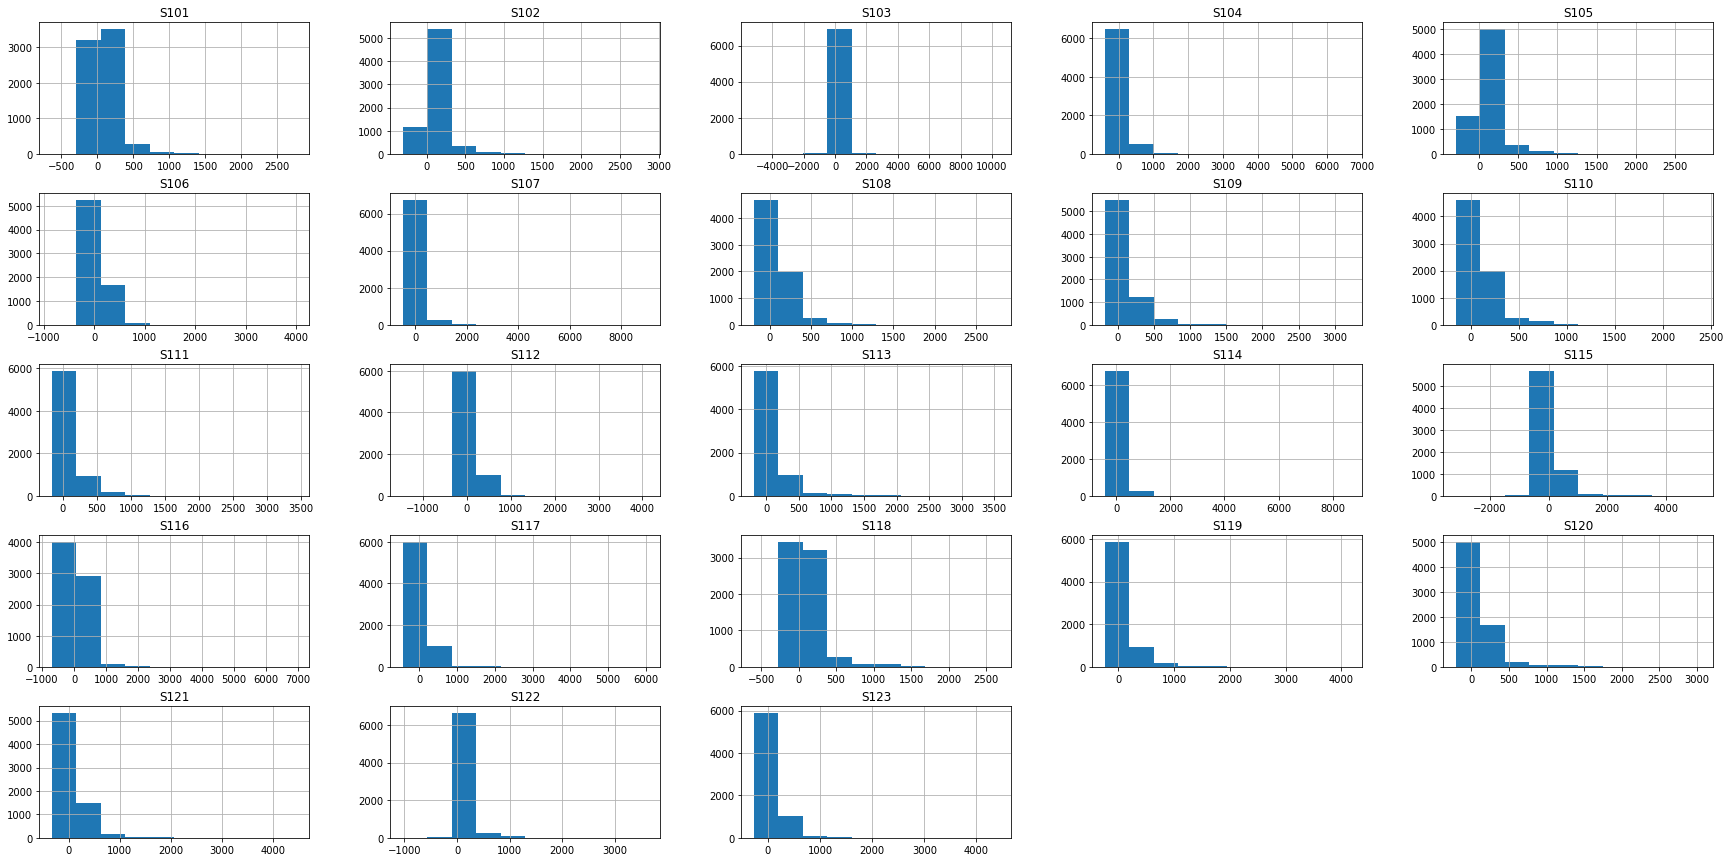

In [11]:
# Univariate Histograms
data_to_use.hist(figsize=(30,15))
plt.show()

# We can see that no attributes  has an exponential
# distribution. We can also see that perhaps some attributes
# have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning
# techniques assume a Gaussian univariate distribution on the input variables.
# This is useful to note as we can use algorithms that can exploit this assumption (Gaussian distribution).

#Some has binomial distribution such as Gender

#It also looks like some attributes may be skewed Gaussian distributions, which
# might be helpful later with transforms.

**Density Plots**

Density plots are another way of getting a quick idea of the distribution of each attribute. The
plots look like an abstracted histogram with a smooth curve drawn through the top of each bin,
much like your eye tried to do with the histograms.

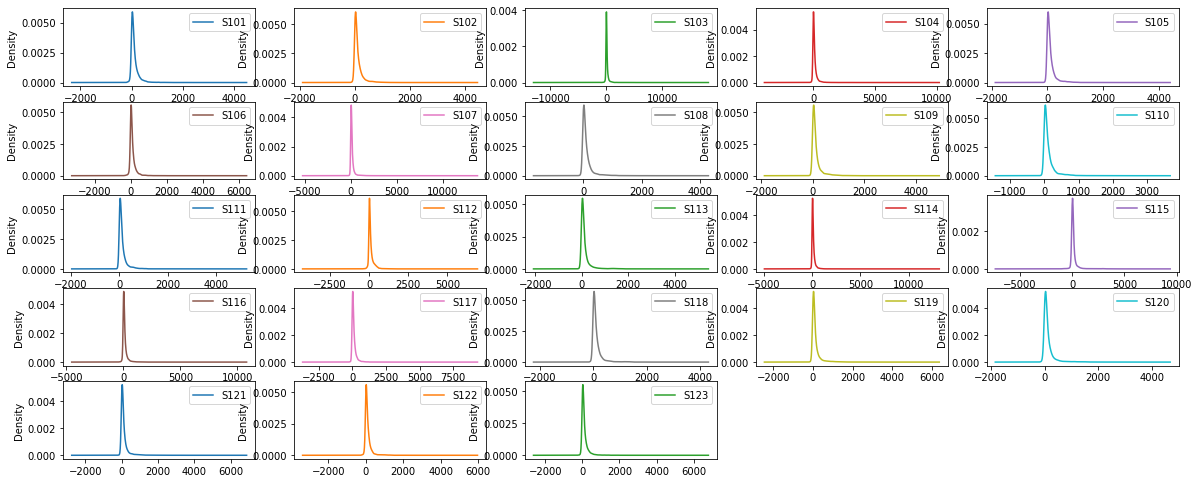

In [12]:
# Univariate Density Plots
data_to_use.plot(kind='density', subplots=True, layout=(6,5), sharex=False)
plt.show()

# This is useful, you can see that some of the attributes have a skewed distribution. A power
# transform like a Box-Cox transform that can correct for the skew in distributions might be
# useful.

# This helps point out the skew in many distributions so much so that data looks like outliers
# (e.g. beyond the whisker of the plots).

**Box and Whisker Plots**

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots
or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for
the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of
the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers
show candidate outlier values (values that are 1.5 times greater than the size of spread of the
middle 50% of the data).

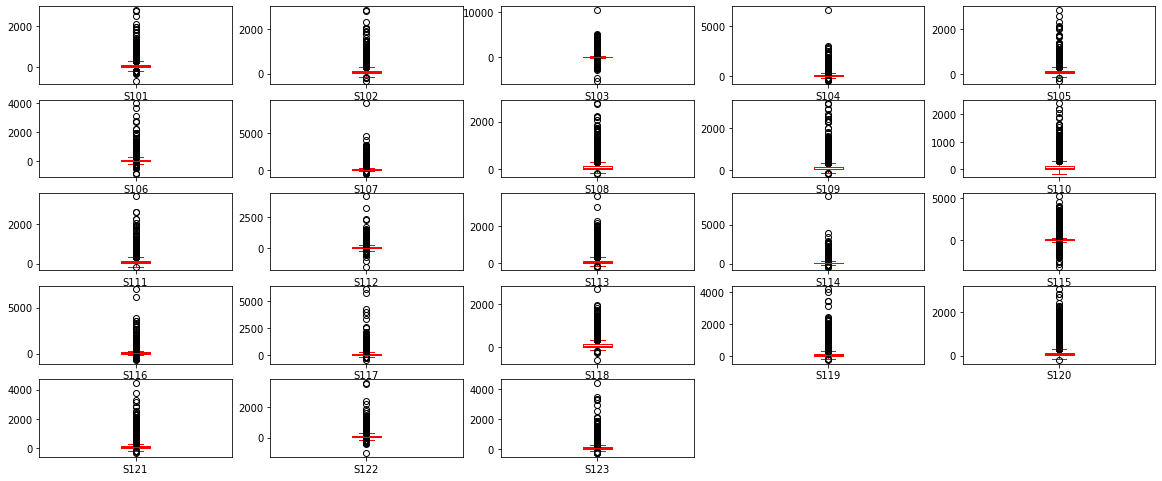

In [13]:
# Box and Whisker Plots
s = data_to_use.plot(kind='box', color='red', subplots=True, layout=(6,5), sharex=False, sharey=False)

# We can see that attributes do have quite dierent spreads. Given(if) the scales are the same, it
# may suggest some benefit in standardizing the data for modelling to get all of the means lined
# up.

**********************************************************************************************
### (2.B.2)Multivariate Plots
**********************************************************************************************
This section describes two plots that show the interactions between multiple variables
in the dataset.

1.   Correlation Matrix Plot.
2.   Scatter Plot Matrix.





**Correlation Matrix Plot**

Correlation gives an indication of how related the changes are between two variables. If two
variables change in the same direction they are positively correlated. If they change in opposite
directions together (one goes up, one goes down), then they are negatively correlated. We can
calculate the correlation between each pair of attributes. This is called a correlation matrix. we
can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in our data.

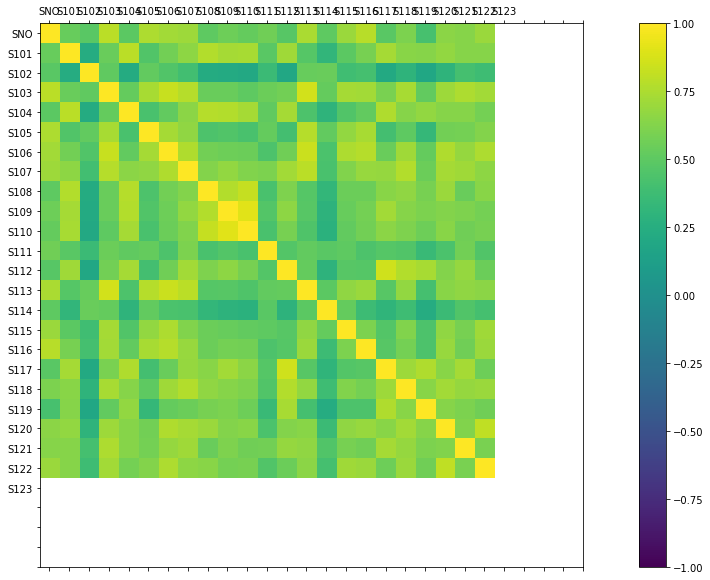

In [14]:
# Correction Matrix Plot

correlations = data_to_use.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,28,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = list(data_to_use.columns)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# The dark yellow color shows positive correlation whereas the dark mauve color shows negative
# correlation. if there is strong correlatoin(+ve or -ve), this suggest candidates for removal
# to better improve accuracy of models later on.

**Scatter Plot Matrix**

A scatter plot shows the relationship between two variables as dots in two dimensions, one
axis for each attribute. We can create a scatter plot for each pair of attributes in the data.
Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful
for spotting structured relationships between variables, like whether we could summarize the
relationship between two variables with a line. Attributes with structured relationships may
also be correlated and good candidates for removal from our dataset.

Like the Correlation Matrix Plot above, the scatter plot matrix is symmetrical. This is
useful to look at the pairwise relationships from different perspectives. Because there is little
point of drawing a scatter plot of each variable with itself, the diagonal shows histograms of
each attribute.

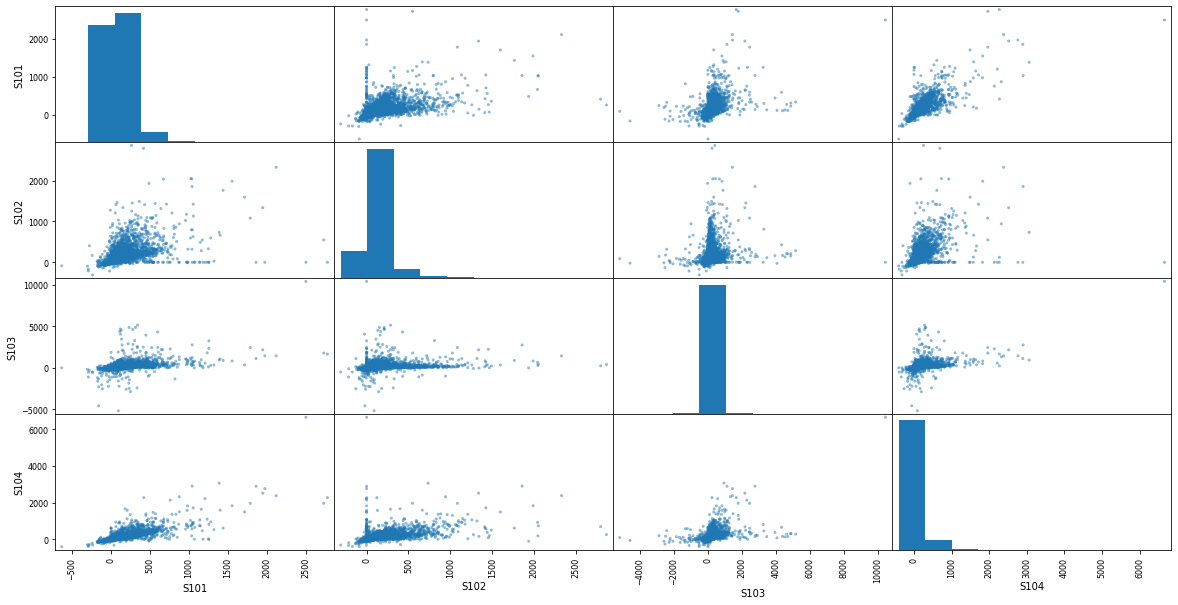

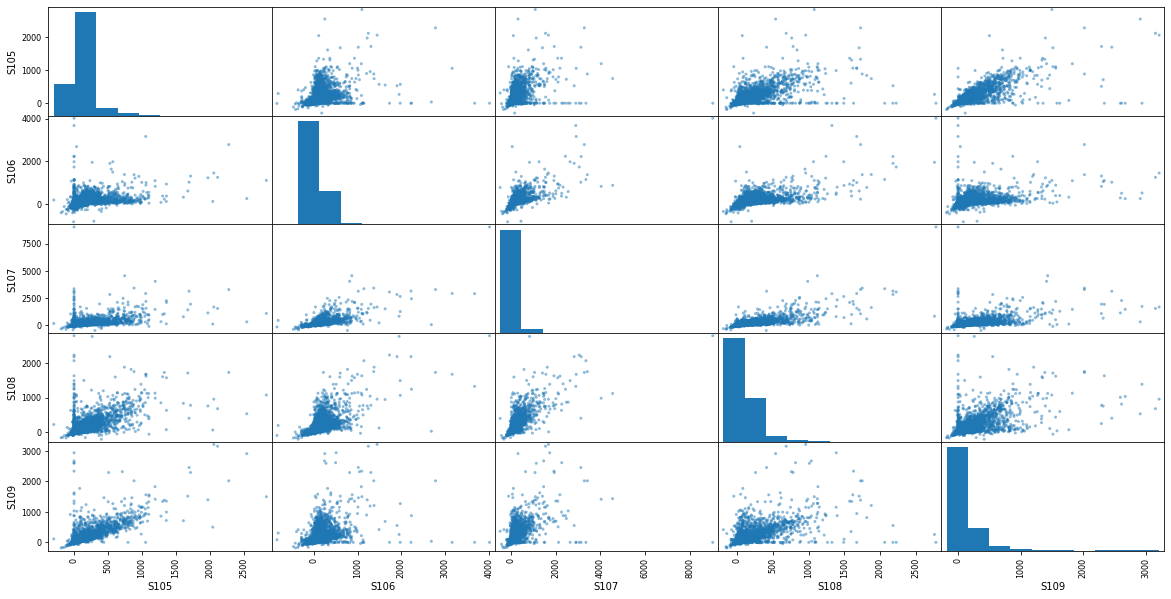

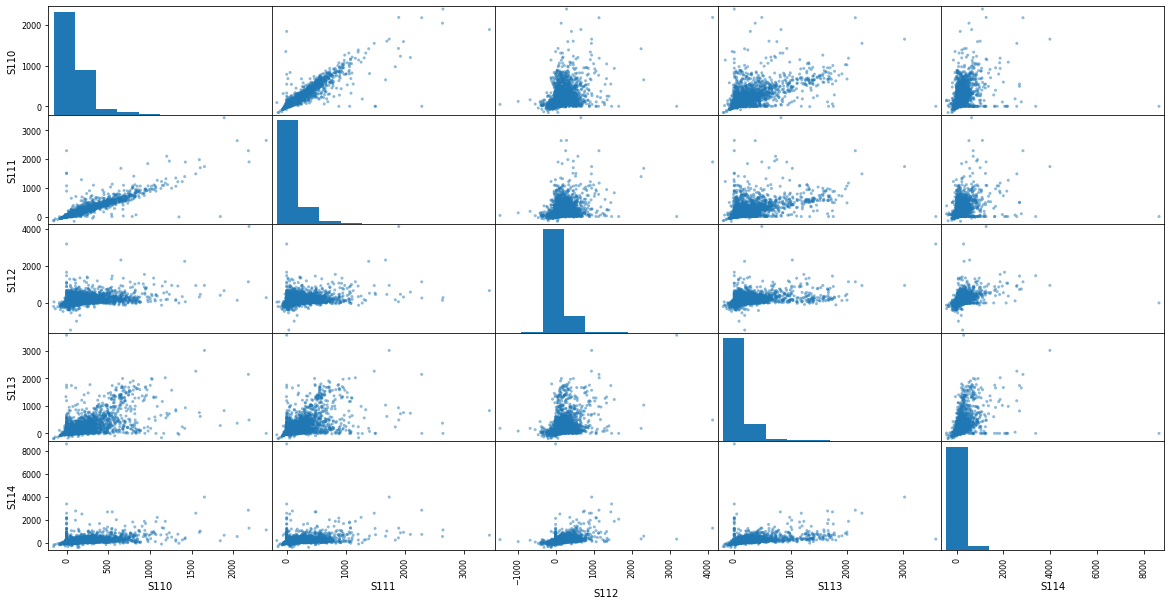

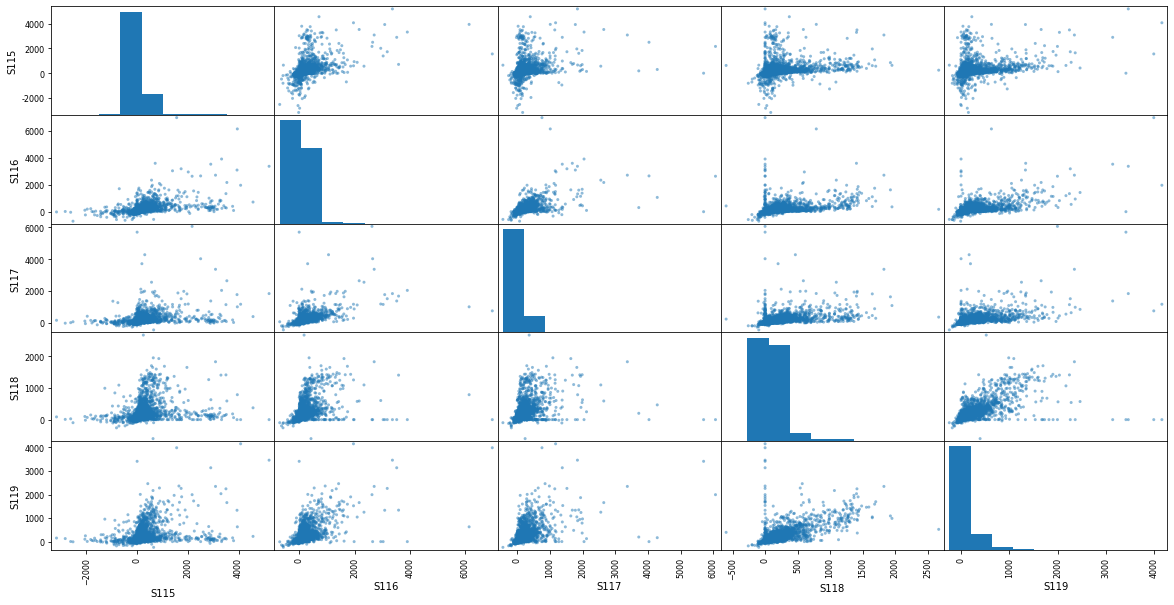

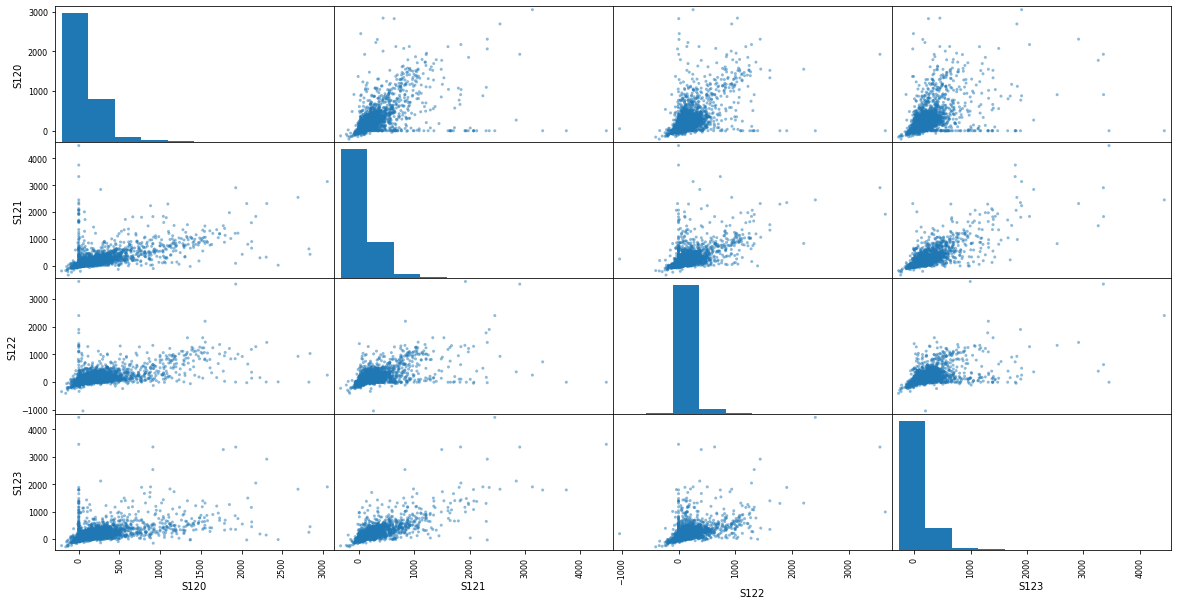

In [15]:
# Scatterplot Matrix
data_to_use.iloc[:,:5]
scatter_matrix(data_to_use.iloc[:,:5])
plt.show()

scatter_matrix(data_to_use.iloc[:,5:10])
plt.show()

scatter_matrix(data_to_use.iloc[:,10:15])
plt.show()

scatter_matrix(data_to_use.iloc[:,15:20])
plt.show()

scatter_matrix(data_to_use.iloc[:,20:25])
plt.show()

#scatter_matrix(data_to_use.iloc[:,25:29])
plt.show()


# Note that there is no diagonal grouping of some pairs of attributes. This suggests a no-high correlation and
# a no-predictable relationship.

# We can see that some of the higher correlated attributes do show good structure in their
# relationship. Not linear, but nice predictable curved relationships.

**********************************************************************************************
# 3.Prepare the Data For Machine Learning
**********************************************************************************************
Many machine learning algorithms make assumptions about the data. It is often a very good
idea to prepare the data in such way to best expose the structure of the problem to the machine
learning algorithms that we intend to use. We will prepare
the data for machine learning (Data Transforms) in Python using scikit-learn:


1.   Discretization-Criteria
2. Rescale data.
3. Standardize data.
4. Normalize data.
5. Binarize data.
6. Log Transform certain features
7. Dealing with categorical features

**********************************************************************************************
## A. Data Transforms
**********************************************************************************************

**Need For Data Pre-processing**

We almost always need to pre-process the data. It is a required step. A difficulty is that
different algorithms make different assumptions about the data and may require different
transforms. Further, when we follow all of the rules and prepare the data, sometimes algorithms
can deliver better results without pre-processing.
Generally, We would recommend creating many different views and transforms of the data,
then exercise a handful of algorithms on each view of the dataset. This will help us to flush
out which data transforms might be better at exposing the structure of our problem in general.

**Data Transforms**

We will work through 4 different data pre-processing recipes for machine learning.

Each recipe follows the same structure:
 
1.   Load the dataset.
2.   Split the dataset into the input and output variables for machine learning.
3. Apply a pre-processing transform to the input variables.
4. Summarize the data to show the change.

The scikit-learn library provides two standard idioms for transforming data. Each are useful
in different circumstances. The transforms are calculated in such a way that they can be applied
to the training data and any samples of data we may have in the future. 
The scikit-learn documentation has some information on how to use various different pre-processing methods:

1.    Fit and Multiple Transform.
2.   Combined Fit-And-Transform.

The Fit and Multiple Transform method is the preferred approach. We call the fit()
function to prepare the parameters of the transform once on our data. Then later we can use
the transform() function on the same data to prepare it for modeling and again on the test or
validation dataset or new data that we may see in the future. The Combined Fit-And-Transform
is a convenience that we can use for one off tasks. This might be useful if we are interested
in plotting or summarizing the transformed data.

**********************************************************************************************
### 3.A.1 Discretization-Criteria
**********************************************************************************************

In [16]:
# drop all those rows which  
# have any 'nan' value in it. 
data_to_use.dropna(inplace = True) 
print(data_to_use)

df = data_to_use.copy()

              SNO  S101  S102  S103  S104  ...  S119  S120  S121  S122  S123
0       A28102_at    58    52    13    46  ...    29    47    44    56   119
1     AB000114_at    36    34    32    30  ...    26    28    34    45    53
2     AB000115_at    10   255     0    14  ...    13   361    16     7    34
3     AB000220_at    64    19   133    62  ...    75   184    57    26    83
4     AB000409_at    17   220   186   232  ...   111   170   147   246   204
...           ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
7065    X83863_at   288   161   400   206  ...   113   136   157   176   198
7066    Z17240_at    74    33    36    44  ...    39    55    48    62    37
7067  L49218_f_at     5     6   -24    13  ...   -13    10    11     3    -7
7068  M71243_f_at    61    22    55    51  ...    -1    41    34    55    60
7069  Z78285_f_at     0    -1     2     0  ...   -24    -1     0    -8    -8

[7070 rows x 24 columns]


Discretize Features

In [17]:
data_to_use_discretizedData = df
data_to_use = data_to_use_discretizedData
data_to_use


,SNO,S101,S102,S103,S104,S105,S106,S107,S108,S109,S110,S111,S112,S113,S114,S115,S116,S117,S118,S119,S120,S121,S122,S123
0,A28102_at,58,52,13,46,48,31,16,23,47,42,46,28,25,11,19,18,70,50,29,47,44,56,119
1,AB000114_at,36,34,32,30,22,57,17,19,29,14,20,32,19,17,57,25,50,36,26,28,34,45,53
2,AB000115_at,10,255,0,14,17,-6,15,17,33,22,41,12,13,18,-2,-7,148,145,13,361,16,7,34
3,AB000220_at,64,19,133,62,110,77,22,33,132,18,30,32,465,84,34,30,69,108,75,184,57,26,83
4,AB000409_at,17,220,186,232,169,251,210,142,131,113,170,252,135,209,166,260,241,165,111,170,147,246,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,X83863_at,288,161,400,206,171,257,216,155,284,234,303,506,95,164,494,197,277,147,113,136,157,176,198
7066,Z17240_at,74,33,36,44,42,43,23,51,35,32,51,55,32,39,104,40,31,44,39,55,48,62,37
7067,L49218_f_at,5,6,-24,13,8,9,7,8,6,4,7,9,6,4,7,17,-24,14,-13,10,11,3,-7
7068,M71243_f_at,61,22,55,51,16,82,48,34,24,23,28,39,23,37,36,62,27,24,-1,41,34,55,60


**Discretize** Outcome

In [18]:
# ''' Remove this comment out if needs to be used
data_to_use_discretizedData = df
data_to_use = data_to_use_discretizedData
data_to_use
# '''


,SNO,S101,S102,S103,S104,S105,S106,S107,S108,S109,S110,S111,S112,S113,S114,S115,S116,S117,S118,S119,S120,S121,S122,S123
0,A28102_at,58,52,13,46,48,31,16,23,47,42,46,28,25,11,19,18,70,50,29,47,44,56,119
1,AB000114_at,36,34,32,30,22,57,17,19,29,14,20,32,19,17,57,25,50,36,26,28,34,45,53
2,AB000115_at,10,255,0,14,17,-6,15,17,33,22,41,12,13,18,-2,-7,148,145,13,361,16,7,34
3,AB000220_at,64,19,133,62,110,77,22,33,132,18,30,32,465,84,34,30,69,108,75,184,57,26,83
4,AB000409_at,17,220,186,232,169,251,210,142,131,113,170,252,135,209,166,260,241,165,111,170,147,246,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,X83863_at,288,161,400,206,171,257,216,155,284,234,303,506,95,164,494,197,277,147,113,136,157,176,198
7066,Z17240_at,74,33,36,44,42,43,23,51,35,32,51,55,32,39,104,40,31,44,39,55,48,62,37
7067,L49218_f_at,5,6,-24,13,8,9,7,8,6,4,7,9,6,4,7,17,-24,14,-13,10,11,3,-7
7068,M71243_f_at,61,22,55,51,16,82,48,34,24,23,28,39,23,37,36,62,27,24,-1,41,34,55,60


### 3.A.6. Log transform certain features (skewed distribution)
After removing the column ‘Disease’ from the dataset as it is the label, we display all features in a histogram format to check if any feature has a skewed distribution. On those features, a log transformation is applied to reduce their range.

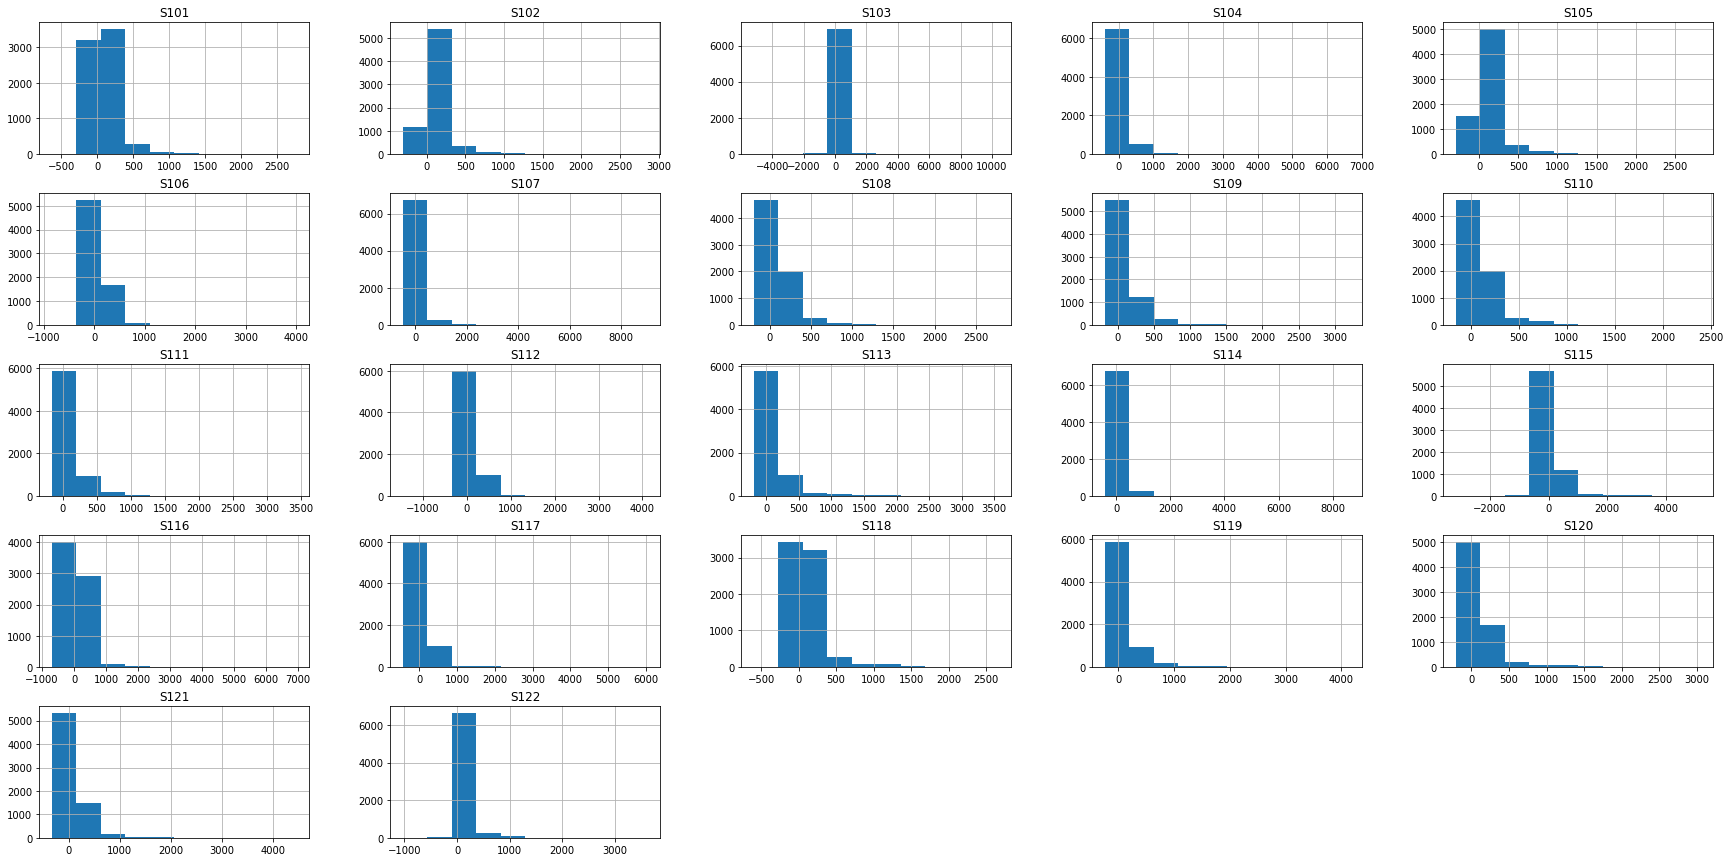

S101     4.876644
S102     4.754997
S103     6.715070
S104     9.080761
S105     4.490358
S106     6.401698
S107    10.531303
S108     4.695266
S109     5.361007
S110     4.109216
S111     5.060773
S112     4.742946
S113     4.671302
S114    11.793470
S115     4.428517
S116     9.260182
S117     9.956578
S118     4.089250
S119     5.421232
S120     4.763273
S121     5.951807
S122     5.386277
S123     6.580753
dtype: float64


In [19]:
# Split the data into features and target label(disease)
disease_initial = data_to_use['S123']
features_initial = data_to_use.drop('S123', axis = 1)

# Visualize skewed continuous features of original data
features_initial.hist(figsize=(30,15))
plt.show()

skew = data_to_use.skew()
print(skew)

In [20]:
'''
# Skewed features 
#Log-transform the skewed features
skewed = ['S120', 'S121', 'S122']
features_initial[skewed] = data_to_use[skewed].apply(lambda x: np.log(x + 1))
data_to_use[skewed] = features_initial[skewed]
# Visualize the new log distributions
data_to_use.hist(figsize=(30,15))
plt.show()

skew = data_to_use.skew()
print(skew)
'''

"\n# Skewed features \n#Log-transform the skewed features\nskewed = ['S120', 'S121', 'S122']\nfeatures_initial[skewed] = data_to_use[skewed].apply(lambda x: np.log(x + 1))\ndata_to_use[skewed] = features_initial[skewed]\n# Visualize the new log distributions\ndata_to_use.hist(figsize=(30,15))\nplt.show()\n\nskew = data_to_use.skew()\nprint(skew)\n"

**********************************************************************************************
### 3.A.2. Rescale Data
**********************************************************************************************
When the data is comprised of attributes with varying scales, many machine learning algorithms
can benefit from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1. This is
useful for optimization algorithms used in the core of machine learning algorithms like gradient
descent. It is also useful for algorithms that weight inputs like regression and neural networks
and algorithms that use distance measures like k-Nearest Neighbors. We can rescale the data
using scikit-learn using the MinMaxScaler class

In [21]:
'''
# Rescale data (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
# print(array)

# separate array into input and output components
X = array[:,1:no_of_attrib]
# print(X)
Y = array[:,no_of_attrib]
# print(Y)
# Y

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
pd.set_option('precision', 3)
set_printoptions(precision=3)
print(rescaledX[0:5,:])
# rescaledX[0:5,:]

dataframe = pd.DataFrame.from_records(data=rescaledX)

dataframe['S124'] = Y

data_to_use = dataframe
'''

"\n# Rescale data (between 0 and 1)\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import StandardScaler\nfrom numpy import set_printoptions\n##############################################################################\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\n# print(array)\n\n# separate array into input and output components\nX = array[:,1:no_of_attrib]\n# print(X)\nY = array[:,no_of_attrib]\n# print(Y)\n# Y\n\nscaler = MinMaxScaler(feature_range=(0, 1))\nrescaledX = scaler.fit_transform(X)\n\n# summarize transformed data\npd.set_option('precision', 3)\nset_printoptions(precision=3)\nprint(rescaledX[0:5,:])\n# rescaledX[0:5,:]\n\ndataframe = pd.DataFrame.from_records(data=rescaledX)\n\ndataframe['S124'] = Y\n\ndata_to_use = dataframe\n"

In [22]:
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

X = array[:,1:no_of_attrib]
Y = array[:,no_of_attrib]


from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X,)


dataframe = pd.DataFrame.from_records(data=X_scale, 
                                      columns=None)

dataframe['S124'] = Y

data_to_use = dataframe
data_to_use



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,S124
0,0.202699,0.113772,0.332545,0.063845,0.110792,0.180341,0.054176,0.074161,0.068001,0.077255,0.059068,0.266464,0.058621,0.048826,0.381458,0.093905,0.079275,0.198655,0.061846,0.079020,0.079701,0.233769,119
1,0.196245,0.108100,0.333760,0.061580,0.102490,0.185688,0.054281,0.072819,0.062702,0.066275,0.051858,0.267180,0.057029,0.049487,0.385992,0.094816,0.076202,0.194377,0.061164,0.073201,0.077626,0.231412,53
2,0.188618,0.177750,0.331714,0.059315,0.100894,0.172733,0.054071,0.072148,0.063880,0.069412,0.057682,0.263601,0.055438,0.049598,0.378952,0.090649,0.091258,0.227689,0.058208,0.175191,0.073890,0.223270,34
3,0.204459,0.103372,0.340217,0.066110,0.130587,0.189801,0.054805,0.077517,0.093023,0.067843,0.054631,0.267180,0.175332,0.056872,0.383248,0.095468,0.079121,0.216381,0.072306,0.120980,0.082399,0.227341,83
4,0.190672,0.166719,0.343606,0.090176,0.149425,0.225581,0.074505,0.114094,0.092729,0.105098,0.093455,0.306550,0.087798,0.070649,0.398998,0.125423,0.105546,0.233802,0.080491,0.116692,0.101079,0.274480,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,0.270167,0.148125,0.357289,0.086495,0.150064,0.226815,0.075134,0.118456,0.137769,0.152549,0.130338,0.352004,0.077188,0.065689,0.438134,0.117218,0.111077,0.228301,0.080946,0.106279,0.103155,0.259481,198
7066,0.207392,0.107784,0.334015,0.063562,0.108876,0.182809,0.054909,0.083557,0.064469,0.073333,0.060455,0.271296,0.060477,0.051912,0.391600,0.096770,0.073283,0.196822,0.064120,0.081470,0.080531,0.235055,37
7067,0.187152,0.099275,0.330179,0.059173,0.098020,0.175817,0.053233,0.069128,0.055932,0.062353,0.048253,0.263064,0.053581,0.048055,0.380026,0.093774,0.064833,0.187653,0.052296,0.067688,0.072852,0.222413,-7
7068,0.203579,0.104318,0.335230,0.064553,0.100575,0.190829,0.057529,0.077852,0.061230,0.069804,0.054077,0.268432,0.058090,0.051692,0.383486,0.099635,0.072669,0.190709,0.055025,0.077182,0.077626,0.233555,60


**********************************************************************************************
### 3.A.3. Standardize Data
**********************************************************************************************
Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1. It is most suitable for techniques that assume a Gaussian
distribution in the input variables and work better with rescaled data, such as linear regression,
logistic regression and linear discriminate analysis. You can standardize data using scikit-learn
with the StandardScaler class

In [23]:

# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

# separate array into input and output components
X = array[:,1:no_of_attrib]
# print(X)
Y = array[:,no_of_attrib]
# print(Y)

scaler = StandardScaler().fit(X)
standardizedX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(standardizedX[0:5,:])
standardizedX.shape

dataframe = pd.DataFrame.from_records(data=standardizedX)

dataframe['S124'] = Y

data_to_use = dataframe


"\n# Standardize data (0 mean, 1 stdev)\nfrom sklearn.preprocessing import StandardScaler\nfrom numpy import set_printoptions\n##############################################################################\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\n\n# separate array into input and output components\nX = array[:,1:no_of_attrib]\n# print(X)\nY = array[:,no_of_attrib]\n# print(Y)\n\nscaler = StandardScaler().fit(X)\nstandardizedX = scaler.transform(X)\n\n# summarize transformed data\nset_printoptions(precision=3)\nprint(standardizedX[0:5,:])\nstandardizedX.shape\n\ndataframe = pd.DataFrame.from_records(data=standardizedX)\n\ndataframe['S124'] = Y\n\ndata_to_use = dataframe\n"

In [24]:
''' Remove this comment out if needs to be used
# data = [standardizedX, data_to_use.values[:,:28]]
data_= pd.DataFrame(standardizedX) 
print(data_)

data_.plot(kind='density', subplots=True, layout=(6,5), sharex=False)
plt.show()
'''

" Remove this comment out if needs to be used\n# data = [standardizedX, data_to_use.values[:,:28]]\ndata_= pd.DataFrame(standardizedX) \nprint(data_)\n\ndata_.plot(kind='density', subplots=True, layout=(6,5), sharex=False)\nplt.show()\n"


**********************************************************************************************
### 3.A.4. Normalize Data
**********************************************************************************************
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra). This pre-processing method
can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using
algorithms that weight input values such as neural networks and algorithms that use distance
measures such as k-Nearest Neighbors. We can normalize data in Python with scikit-learn
using the Normalizer class

In [25]:
''' Remove this comment out if needs to be used
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

# separate array into input and output components
X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])
print(normalizedX.shape)

dtframe_normalized = pd.DataFrame.from_records(data=normalizedX, 
                                      columns=data_to_use.drop(columns=['S124']).columns)

dtframe_normalized['S124'] = Y

data_to_use = dtframe_normalized
'''

" Remove this comment out if needs to be used\n# Normalize data (length of 1)\nfrom sklearn.preprocessing import Normalizer\nfrom numpy import set_printoptions\n##############################################################################\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\n\n# separate array into input and output components\nX = array[:,0:no_of_attrib]\nY = array[:,no_of_attrib]\n\nscaler = Normalizer().fit(X)\nnormalizedX = scaler.transform(X)\n# summarize transformed data\nset_printoptions(precision=3)\nprint(normalizedX[0:5,:])\nprint(normalizedX.shape)\n\ndtframe_normalized = pd.DataFrame.from_records(data=normalizedX, \n                                      columns=data_to_use.drop(columns=['S124']).columns)\n\ndtframe_normalized['S124'] = Y\n\ndata_to_use = dtframe_normalized\n"

**********************************************************************************************
### 3.A.5 Binarize Data (Make Binary)
**********************************************************************************************
We can transform the data using a binary threshold. All values above the threshold are
marked 1 and all equal to or below are marked as 0. This is called binarizing the data or
thresholding the data. It can be useful when we have probabilities that we want to make crisp
values. It is also useful when feature engineering and we want to add new features that indicate
something meaningful. we can create new binary attributes in Python using scikit-learn with
the Binarizer class

In [26]:
''' Remove this comment out if needs to be used
# binarization
from sklearn.preprocessing import Binarizer
from numpy import set_printoptions
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
print(array)
# separate array into input and output components
X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]

binarizer = Binarizer(threshold=30.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])


dtframe_normalized = pd.DataFrame.from_records(data=binaryX, 
                                      columns=data_to_use.drop(columns=['S124']).columns)

dtframe_normalized['S124'] = Y

data_to_use = dtframe_normalized
'''

" Remove this comment out if needs to be used\n# binarization\nfrom sklearn.preprocessing import Binarizer\nfrom numpy import set_printoptions\n##############################################################################\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\nprint(array)\n# separate array into input and output components\nX = array[:,0:no_of_attrib]\nY = array[:,no_of_attrib]\n\nbinarizer = Binarizer(threshold=30.0).fit(X)\nbinaryX = binarizer.transform(X)\n# summarize transformed data\nset_printoptions(precision=3)\nprint(binaryX[0:5,:])\n\n\ndtframe_normalized = pd.DataFrame.from_records(data=binaryX, \n                                      columns=data_to_use.drop(columns=['S124']).columns)\n\ndtframe_normalized['S124'] = Y\n\ndata_to_use = dtframe_normalized\n"

### 3.B.7. Dealing with categorical features (One-hot encoding)

One-hot encoding is a popular method that can be used when the different values of features do not have any inherent ordering. If we know of some ordering (such as a feature which has possible values 'Small', 'Medium', 'Large'), then using the method LabelEncoder can make more sense. Here we use pd.get_dummies() method to one-hot encode the feature ‘Gender’ as well as the label ‘Disease’ ( with the integer ‘1’ representing presence of disease).

In [27]:
# ''' Remove this comment out if needs to be used
disease_initial = data_to_use['S124']
features_initial = data_to_use.drop('S124', axis = 1)

features = pd.get_dummies(features_initial)

encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)

disease=pd.get_dummies(disease_initial)
encoded = list(disease.columns)
print ("{} disease columns after one-hot encoding.".format(len(encoded)))
# print (disease[1])


dataframe = pd.DataFrame.from_records(data=features, 
                                      columns=data_to_use.drop(columns=['S124']).columns)

dataframe['S124'] = disease[1]

data_to_use = dataframe
# '''

22 total features after one-hot encoding.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
784 disease columns after one-hot encoding.


**********************************************************************************************
## B. Feature Selection For Machine Learning
**********************************************************************************************

The data features that we use to train our machine learning models have a huge influence on the performance we can achieve. Irrelevant or partially relevant features can negatively impact model performance. We will discover automatic feature selection techniques
that we can use to prepare our machine learning data in Python with scikit-learn. 

1. Univariate Selection.
2. Recursive Feature Elimination.
3. Principle Component Analysis.
4. Feature Importance.

**********************************************************************************************
### 3.B.1. Univariate Selection
**********************************************************************************************
Statistical tests can be used to select those features that have the strongest relationship with
the output variable. The scikit-learn library provides the SelectKBest class2 that can be used
with a suite of different statistical tests to select a specific number of features. The example
below uses the chi-squared (chi2) statistical test for non-negative features to select 10 of the best
features from the dataset.

We can see the scores for each attribute and the 10 attributes chosen (those with the highest
scores): plas, test, mass and age. We got the names for the chosen attributes by manually
mapping the index of the 10 highest scores to the index of the attribute names.

In [28]:
''' Remove this comment out if needs to be used
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
##############################################################################

no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

X = array[:,0:no_of_attrib]
# X=rescaledX

Y = array[:,no_of_attrib]

# feature extraction
X_new = SelectKBest(score_func=chi2, k=3).fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(X_new.scores_)
features = X_new.transform(X)
# summarize selected features
print(features[0:5,:])
print(features.shape)
'''

' Remove this comment out if needs to be used\n# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)\nfrom numpy import set_printoptions\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\n##############################################################################\n\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\n\nX = array[:,0:no_of_attrib]\n# X=rescaledX\n\nY = array[:,no_of_attrib]\n\n# feature extraction\nX_new = SelectKBest(score_func=chi2, k=3).fit(X, Y)\n# summarize scores\nset_printoptions(precision=3)\nprint(X_new.scores_)\nfeatures = X_new.transform(X)\n# summarize selected features\nprint(features[0:5,:])\nprint(features.shape)\n'

**********************************************************************************************



### 3.B.2. Recursive Feature Elimination (RFE)
**********************************************************************************************
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and
building a model on those attributes that remain. It uses the model accuracy to identify which
attributes (and combination of attributes) contribute the most to predicting the target attribute.
We can learn more about the RFE class3 in the scikit-learn documentation. The example below
uses RFE with the logistic regression algorithm to select the top 10 features. The choice of
algorithm does not matter too much as long as it is skillful and consistent.

We can see that RFE chose the top 10 features as preg, mass and pedi. These are marked
True in the support array and marked with a choice 1 in the ranking array. Again, we can
manually map the feature indexes to the indexes of attribute names.

In [29]:
''' Remove this comment out if needs to be used
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
##############################################################################

no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
# array = data_to_use_discretizedData.values

X = array[:,0:no_of_attrib]
# X =rescaledX
Y = array[:,no_of_attrib]
# feature extraction
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
# print("Num Features: %d") %fit.n_features_
print("Num Features:")
print(fit.n_features_)
# print("Selected Features: %s") % fit.support_
print("Selected Features:")
print(fit.support_)
# print("Feature Ranking: %s") % fit.ranking_
print("Feature Ranking:")
print(fit.ranking_)
'''

' Remove this comment out if needs to be used\n# Feature Extraction with RFE\nfrom sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\n##############################################################################\n\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\n# array = data_to_use_discretizedData.values\n\nX = array[:,0:no_of_attrib]\n# X =rescaledX\nY = array[:,no_of_attrib]\n# feature extraction\nmodel = LogisticRegression(solver=\'lbfgs\', multi_class=\'auto\', max_iter=1000)\nrfe = RFE(model, 10)\nfit = rfe.fit(X, Y)\n# print("Num Features: %d") %fit.n_features_\nprint("Num Features:")\nprint(fit.n_features_)\n# print("Selected Features: %s") % fit.support_\nprint("Selected Features:")\nprint(fit.support_)\n# print("Feature Ranking: %s") % fit.ranking_\nprint("Feature Ranking:")\nprint(fit.ranking_)\n'

In [30]:
''' Remove this comment out if needs to be used
# Delete multiple columns from the dataframe
# data_to_use_feature_selected = data_to_use_discretizedData.drop(["Gender", "Fever", "Nausea-Vomting","Headache",
#                   "Diarrhea","Fatigue-generalized-bone-ache","Jaundice",
#                   "Epigastric-pain","WBC","RBC",
#                   "HGB","Plat","ALT4","ALT12",
#                   "ALT24","ALT36","RNABase","RNA4"], axis=1)
index = 0
for i in fit.ranking_:
  print(i)
  index = index +1
  data_to_use_feature_selected = data_to_use.drop(data_to_use.iloc[: , i])
  print(data_to_use)

data_to_use(0)

data_to_use.iloc[: , 0]
'''

' Remove this comment out if needs to be used\n# Delete multiple columns from the dataframe\n# data_to_use_feature_selected = data_to_use_discretizedData.drop(["Gender", "Fever", "Nausea-Vomting","Headache",\n#                   "Diarrhea","Fatigue-generalized-bone-ache","Jaundice",\n#                   "Epigastric-pain","WBC","RBC",\n#                   "HGB","Plat","ALT4","ALT12",\n#                   "ALT24","ALT36","RNABase","RNA4"], axis=1)\nindex = 0\nfor i in fit.ranking_:\n  print(i)\n  index = index +1\n  data_to_use_feature_selected = data_to_use.drop(data_to_use.iloc[: , i])\n  print(data_to_use)\n\ndata_to_use(0)\n\ndata_to_use.iloc[: , 0]\n'

**********************************************************************************************
### 3.B.3. Principal Component Analysis
**********************************************************************************************
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a
compressed form. Generally this is called a data reduction technique. A property of PCA is that
you can choose the number of dimensions or principal components in the transformed result. In
the example below, we use PCA and select 3 principal components.



In [31]:
''' Remove this comment out if needs to be used
# Feature Extraction with PCA
from sklearn.decomposition import PCA
##############################################################################

no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
# print("Explained Variance: %s") % fit.explained_variance_ratio_
print("Explained Variance:")
print(fit.explained_variance_ratio_)

print(fit.components_)
'''

' Remove this comment out if needs to be used\n# Feature Extraction with PCA\nfrom sklearn.decomposition import PCA\n##############################################################################\n\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\n\nX = array[:,0:no_of_attrib]\nY = array[:,no_of_attrib]\n# feature extraction\npca = PCA(n_components=3)\nfit = pca.fit(X)\n# summarize components\n# print("Explained Variance: %s") % fit.explained_variance_ratio_\nprint("Explained Variance:")\nprint(fit.explained_variance_ratio_)\n\nprint(fit.components_)\n'

**********************************************************************************************
### 3.B.4. Feature Importance Using ExtraTreesClassifier
**********************************************************************************************

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance
of features. In the example below we construct a ExtraTreesClassifier classier for dataset.

We can see that we are given an importance score for each attribute where the larger the
score, the more important the attribute. The scores suggest at the importance of plas, age
and mass.

In [32]:
''' Remove this comment out if needs to be used
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]

# feature extraction
model = ExtraTreesClassifier(n_estimators = 100)
model.fit(X, Y)
print(model.feature_importances_)

#####################
feature_imp = pd.Series(model.feature_importances_,index=data_to_use.drop(columns=['S124']).columns).sort_values(ascending=False)
print(feature_imp)

# data_to_use.columns
# mmmm = data_to_use.drop(columns=['S124'])
########################
print('\n')
print('*' * 80)
print('\nFinding Important Features')


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend(feature_imp)
plt.show()


print('\nImportance of Features: \n\n',feature_imp)
'''

' Remove this comment out if needs to be used\n# Feature Importance with Extra Trees Classifier\nfrom sklearn.ensemble import ExtraTreesClassifier\n##############################################################################\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\n\nX = array[:,0:no_of_attrib]\nY = array[:,no_of_attrib]\n\n# feature extraction\nmodel = ExtraTreesClassifier(n_estimators = 100)\nmodel.fit(X, Y)\nprint(model.feature_importances_)\n\n#####################\nfeature_imp = pd.Series(model.feature_importances_,index=data_to_use.drop(columns=[\'S124\']).columns).sort_values(ascending=False)\nprint(feature_imp)\n\n# data_to_use.columns\n# mmmm = data_to_use.drop(columns=[\'S124\'])\n########################\nprint(\'\n\')\nprint(\'*\' * 80)\nprint(\'\nFinding Important Features\')\n\n\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n%matplotlib inline\n# Creating a bar plot\nsns.barplot(x=feature_imp, y=feat

**********************************************************************************************
### 3.B.5. Finding Important Features Using RandomForestClassifier
**********************************************************************************************
perform this task in the following steps:
1. First, we need to create a random forests model.
2. Second, use the feature importance variable to see feature importance scores.
3. Third, visualize these scores using the seaborn library.



********************************************************************************

Finding Important Features


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


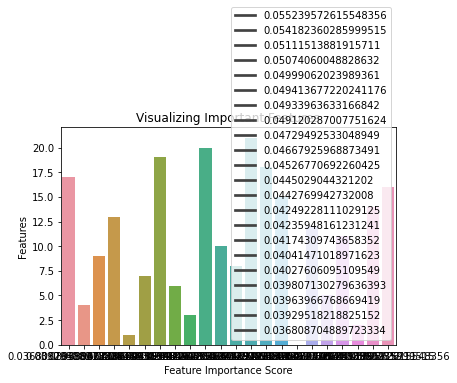


Importance of Features: 

 16    0.055240
14    0.054182
2     0.051115
11    0.050741
5     0.049991
12    0.049414
0     0.049340
15    0.049120
18    0.047295
21    0.046679
8     0.045268
10    0.044503
20    0.044277
3     0.042492
6     0.042359
19    0.041743
7     0.040415
1     0.040276
13    0.039807
9     0.039640
4     0.039295
17    0.036809
dtype: float64


In [33]:
# ''' Remove this comment out if needs to be used
from sklearn.ensemble import RandomForestClassifier
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]

classifier_randomForest = RandomForestClassifier(n_estimators=100)

#Fitting the training data to the network
classifier_randomForest.fit(X, Y)

feature_imp = pd.Series(classifier_randomForest.feature_importances_,index=data_to_use.drop(columns=['S124']).columns).sort_values(ascending=False)

print('\n')
print('*' * 80)
print('\nFinding Important Features')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend(feature_imp)
plt.show()

print('\nImportance of Features: \n\n',feature_imp)
# '''

In [34]:
''' Remove this comment out if needs to be used
#Remove some features from Dataset
list_to_delete=[]; list_to_delete.clear()

# print('\n\n')
for i in range(-8,0):
  # print(i)
  list_to_delete.append(feature_imp.index[i])

# Delete multiple columns from the dataframe
data_to_use = data_to_use.drop(list_to_delete, axis=1)
data_to_use
'''

" Remove this comment out if needs to be used\n#Remove some features from Dataset\nlist_to_delete=[]; list_to_delete.clear()\n\n# print('\n\n')\nfor i in range(-8,0):\n  # print(i)\n  list_to_delete.append(feature_imp.index[i])\n\n# Delete multiple columns from the dataframe\ndata_to_use = data_to_use.drop(list_to_delete, axis=1)\ndata_to_use\n"

**********************************************************************************************
### 3.B.6 Removing features with low variance
**********************************************************************************************
*   Features = attributes (machine learning nomenclature)
*   Removing features with low variance
*   VarianceThreshold is simple baseline approach to feature selection
*   Removes all features whose variance doesn’t meet some threshold
*   Removes all zero variance features (features with same value in all samples)
*   Example: dataset with Boolean features, want to remove all features that are either 1 or 0 in 80% of instances 
*   Boolean features are Bernoulli random variables, so 𝑣𝑎𝑟_𝑥_=𝑝(1咵𝑝)
*   And set the threshold at 0.8_1−0.8_=0.16


VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.
As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by
 
 https://scikit-learn.org/stable/modules/feature_selection.html
 
so we can select using the threshold .8 * (1 - .8):



In [35]:
''' Remove this comment out if needs to be used
from sklearn.feature_selection import VarianceThreshold
##############################################################################

# X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# sel.fit_transform(X)

no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

X = array[:,0:no_of_attrib]
print(X.shape)
Y = array[:,no_of_attrib]

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

new_X = sel.fit_transform(X)
print(new_X.shape)


dataframe = pd.DataFrame.from_records(data=new_X, 
                                      columns=data_to_use.drop(columns=['S124']).columns)

dataframe['S124'] = Y

data_to_use = dataframe
data_to_use
'''

" Remove this comment out if needs to be used\nfrom sklearn.feature_selection import VarianceThreshold\n##############################################################################\n\n# X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]\n# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))\n# sel.fit_transform(X)\n\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\n\nX = array[:,0:no_of_attrib]\nprint(X.shape)\nY = array[:,no_of_attrib]\n\nsel = VarianceThreshold(threshold=(.8 * (1 - .8)))\n\nnew_X = sel.fit_transform(X)\nprint(new_X.shape)\n\n\ndataframe = pd.DataFrame.from_records(data=new_X, \n                                      columns=data_to_use.drop(columns=['S124']).columns)\n\ndataframe['S124'] = Y\n\ndata_to_use = dataframe\ndata_to_use\n"

**********************************************************************************************
# 5.Evaluate Some Algorithms
**********************************************************************************************
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross validation.
3. Build 5 dierent models to predict species from 
ower measurements
4. Select the best model.

**********************************************************************************************
## 5.1 Create a Validation Dataset
**********************************************************************************************
We will split the loaded dataset into two, 67%
of which we will use to train our models and 33% that we will hold back as a validation dataset.


In [36]:
from sklearn.model_selection import train_test_split
##############################################################################

# Split-out validation dataset
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
# no_of_attributes = data_to_use_feature_selected.shape[1]
# array = data_to_use_feature_selected.values
# no_of_attributes = discretizedData.shape[1]
# array = discretizedData.values

X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]

validation_size = 0.05
seed = 7
# X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
# test_size=validation_size, random_state=seed)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.33)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.1)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Validation set has {} samples.".format(X_validation.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

# We now have training data in the X train and Y train for preparing models and a
# X validation and Y validation sets that we can use later.

Training set has 4736 samples.
Validation set has 2100 samples.
Testing set has 234 samples.


**********************************************************************************************
## 5.2 Test Harness
**********************************************************************************************
We will use 10-fold cross validation to estimate accuracy. This will split our dataset into 10
parts, train on 9 and test on 1 and repeat for all combinations of train-test splits. We are using
the metric of accuracy to evaluate models. This is a ratio of the number of correctly predicted
instances divided by the total number of instances in the dataset multiplied by 100 to give a
percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and
evaluate each model next.

**********************************************************************************************
## 5.3 Build Models
**********************************************************************************************
We don't know which algorithms would be good on this problem or what configurations to use.
We get an idea from the plots that some of the classes are partially linearly separable in some
dimensions, so we are expecting generally good results. Let's evaluate six dierent algorithms:

*   Logistic Regression (LR).
*   Linear Discriminant Analysis (LDA).
*   k-Nearest Neighbors (KNN).
*   Classication and Regression Trees (CART).
*   Gaussian Naive Bayes (NB).
*   Support Vector Machines (SVM).

This list is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB
and SVM) algorithms. We reset the random number seed before each run to ensure that the
evaluation of each algorithm is performed using exactly the same data splits. It ensures the
results are directly comparable. Let's build and evaluate our six models using **Spot-Check Classification Algorithms:**


**What Techniques to Use When**

This section lists some tips to consider what resampling technique to use in different circum-stances.
Generally k-fold cross validation is the gold standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.
Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets.
Techniques like leave-one-out cross validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.
The best advice is to experiment and find a technique for your problem that is fast and produces reasonable estimates of performance that you can use to make decisions. If in doubt, use 10-fold cross validation.

**********************************************************************************************
### Spot-Check Classication Algorithms
**********************************************************************************************
Spot-checking is a way of discovering which algorithms perform well on our machine learning
problem. We cannot know which algorithms are best suited to our problem beforehand. We
must try a number of methods and focus attention on those that prove themselves the most
promising. We will discover six machine learning algorithms that we can use
when spot-checking our classication problem in Python with scikit-learn :
1. How to spot-check machine learning algorithms on a classication problem.
2. How to spot-check two linear classication algorithms.
3. How to spot-check four nonlinear classication algorithms.

We are going to take a look at six classication algorithms that we can spot-check on our
dataset. Starting with **two linear machine learning algorithms**:

1.   **Logistic Regression.**
Logistic regression assumes a Gaussian distribution for the numeric input variables and can model binary classification problems. we can construct a logistic regression model using the LogisticRegression class1.
2.   **Linear Discriminant Analysis.** Linear Discriminant Analysis or LDA is a statistical technique for binary and multiclass classification. It too assumes a Gaussian distribution for the numerical input variables. We can construct an LDA model using the LinearDiscriminantAnalysis class

Then looking at **four nonlinear machine learning algorithms**:

*   **k-Nearest Neighbors.**The k-Nearest Neighbors algorithm (or KNN) uses a distance metric to find the k most similar instances in the training data for a new instance and takes the mean outcome of the neighbors as the prediction. You can construct a KNN model using the KNeighborsClassifier class
*   **Naive Bayes.**Naive Bayes calculates the probability of each class and the conditional probability of each class given each input value. These probabilities are estimated for new data and multiplied together,
assuming that they are all independent (a simple or naive assumption). When working with real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for input variables using the Gaussian Probability Density Function. We can construct a Naive
Bayes model using the GaussianNB class
*   **Classication and Regression Trees.**Classication and Regression Trees (CART or just decision trees) construct a binary tree from the training data. Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the Gini index).
We can construct a CART model using the DecisionTreeClassifier class
*   **Support Vector Machines.**Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors
and influence where the line is placed. SVM has been extended to support multiple classes.
Of particular importance is the use of dierent kernel functions via the kernel parameter. A powerful Radial Basis Function is used by default. We can construct an SVM model using the SVC class

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
##############################################################################

# Spot-Check Algorithms
models = [] ; models.clear
modelName = []; modelName.clear
# Linear Regression
# models.append(('Linear Regression', LinearRegression()))
# Logistic Regression Classification
models.append(('LR', LogisticRegression(C= 0.001, solver='lbfgs', multi_class='auto', max_iter=1000)))
modelName.append('LR')
# Linear Discriminant Analysis
models.append(('LDA', LinearDiscriminantAnalysis()))
modelName.append('LDA')
# KNN Classification
models.append(('KNN', KNeighborsClassifier(n_neighbors=7)))
modelName.append('KNN')
# Gaussian Naive Bayes Classification
models.append(('NB', GaussianNB(priors=None, var_smoothing=1e-09)))
modelName.append('NB')
# Classication and Regression Trees (CART or just decision trees) Calssification
models.append(('CART', DecisionTreeClassifier()))
modelName.append('CART')
# Support Vector Machines (or SVM) Calssification
models.append(('SVM', SVC(gamma='auto', C=10, probability=True)))
modelName.append('SVM')
# XGBoost Calssification
models.append(('XGBoost', XGBClassifier(colsample_bytree=0.6, gamma=0, max_depth=10, subsample=0.7)))
modelName.append('XGBoost')
# MLPClassifier
models.append(('MLP', MLPClassifier(activation='tanh', 
                                    alpha= 0.0001, hidden_layer_sizes= (100,), 
                                    learning_rate= 'adaptive', solver= 'lbfgs')))
modelName.append('MLP')

# models.append(('MLP', MLPClassifier(max_iter=3000)))
# models.append(('MLP', MLPClassifier(hidden_layer_sizes=(150,100,50),
#                     max_iter=3000 ,activation = 'relu',
#                     solver='adam',random_state=1)))
# mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
#                     max_iter=800 ,activation = 'relu',
#                     solver='adam',random_state=1) # neural network
      # * hidden_layer_sizes : This parameter allows us to set the number of layers and the number of nodes we
      #   wish to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes
      #   at the ith position where i is the index of the tuple. Thus the length of tuple denotes the total number
      #   of hidden layers in the network.
      # * max_iter: It denotes the number of epochs.
      # * activation: The activation function for the hidden layers.
      # * solver: This parameter specifies the algorithm for weight optimization across the nodes.
      # * random_state: The parameter allows to set a seed for reproducing the same results
# evaluate each model in turn
results = []
names = []

seed = 7
for name, model in models:
  # 10-fold cross validation: run the training algorithm 10 times, 
  # with a different 1/3 of the data as test set each time
  kfold = KFold(n_splits=3, random_state=seed)
  # print(model)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg) #mean estimated accuracy & Standard deviation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.991131 (0.001037)
LDA: 0.990498 (0.001371)
KNN: 0.991131 (0.001037)
NB: 0.571575 (0.043140)
CART: 0.977619 (0.002383)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.991131 (0.001037)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBoost: 0.991131 (0.001037)
MLP: 0.991131 (0.001037)


********************************************************************************

*   List item

*   List item
*   List item


*   List item

**************
### Training Classifiers on the training data
*********************************************************************************************

In [38]:
#  import and initialize the following classifers from sklearn:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
##############################################################################
data_ = [] ; data_.clear()

#for the Data
data_.append(('Data', X_train, Y_train ))
# We now have training data in the X train and Y train for preparing models.

accuracies = [] ; accuracies.clear
names = [] ; names.clear
matrix_accuracy = np.zeros((1,len(models)))

i=0;

print('\n')
print('*' * 80)
print('\nTraining Classifiers on the training data:\n')

for dataname, Xtrain, Ytrain in data_:
  print(dataname)
  j = 0
  for name, model in models:

    #Fitting the training data to the network
    model.fit(X_train, Y_train)
    
    # Using the trained network to predict
    #Predicting y for X_val
    # Y_pred = model.predict(X_validation)
    accuracy = model.score(X_validation, Y_validation)
    
    accuracies.append(accuracy)
    names.append(name)
    msg = "%s (accuracy): %f" % (name, accuracy)
    print(msg) # name of classifier & its accuracy after training it.
    # print('i is : %d', i)
    matrix_accuracy[i][j] = accuracy
    j = j + 1
  i = i + 1
  print('\n')

print('Matrix for Accuracy-Rate (Dataset vs. Classifiers) :\n\n' , matrix_accuracy)



********************************************************************************

Training Classifiers on the training data:

Data
LR (accuracy): 0.990952
LDA (accuracy): 0.990952
KNN (accuracy): 0.990952
NB (accuracy): 0.543333
CART (accuracy): 0.978095
SVM (accuracy): 0.990952
XGBoost (accuracy): 0.990952
MLP (accuracy): 0.990952


Matrix for Accuracy-Rate (Dataset vs. Classifiers) :

 [[0.99095238 0.99095238 0.99095238 0.54333333 0.97809524 0.99095238
  0.99095238 0.99095238]]


**********************************************************************************************
### Tuning LR (Logistic Regression)
**********************************************************************************************

In [39]:
''' Remove this comment out if needs to be used
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
##############################################################################

# Tune scaled Linear Regression
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# neighbors = [1,3,5,7,9,11,13,15,17,19,21]
Cs = [0.001,0.01,0.1,1,10,100]
# alphs=[0.005,0.05,0.5,5]
# param_grid = dict(n_neighbors=neighbors)
param_grid = dict(C=Cs)
# param_grid = dict(alpha=alphs)
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# model = SGDClassifier(penalty='l2', max_iter=100,n_jobs=-1)
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
scoring = 'accuracy'
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

model.get_params().keys()
'''

' Remove this comment out if needs to be used\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import SGDClassifier\n##############################################################################\n\n# Tune scaled Linear Regression\nscaler = StandardScaler().fit(X_train)\nrescaledX = scaler.transform(X_train)\n# neighbors = [1,3,5,7,9,11,13,15,17,19,21]\nCs = [0.001,0.01,0.1,1,10,100]\n# alphs=[0.005,0.05,0.5,5]\n# param_grid = dict(n_neighbors=neighbors)\nparam_grid = dict(C=Cs)\n# param_grid = dict(alpha=alphs)\nmodel = LogisticRegression(solver=\'lbfgs\', multi_class=\'auto\', max_iter=1000)\n# model = SGDClassifier(penalty=\'l2\', max_iter=100,n_jobs=-1)\nnum_folds = 10\nkfold = KFold(n_splits=num_folds, random_state=seed)\nscoring = \'accuracy\'\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)\ngrid_result = grid.fit(rescaledX, Y_train)\nprint("Best: %f using %s" % (




**********************************************************************************************
### Tuning LDA (Linear Discriminant Analysis)
**********************************************************************************************

In [40]:
''' Remove this comment out if needs to be used
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
##############################################################################

# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

solvr = ['svd','lsqr','eigen']
param_grid = dict(solver=solvr)

ncomponents = [2,4,6,8,10,12,15,20,25,30]
param_grid = dict(n_components=ncomponents)

model = LinearDiscriminantAnalysis()
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
scoring = 'accuracy'
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

model.get_params().keys()
'''

' Remove this comment out if needs to be used\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import GridSearchCV\n##############################################################################\n\n# Tune scaled KNN\nscaler = StandardScaler().fit(X_train)\nrescaledX = scaler.transform(X_train)\n\nsolvr = [\'svd\',\'lsqr\',\'eigen\']\nparam_grid = dict(solver=solvr)\n\nncomponents = [2,4,6,8,10,12,15,20,25,30]\nparam_grid = dict(n_components=ncomponents)\n\nmodel = LinearDiscriminantAnalysis()\nnum_folds = 10\nkfold = KFold(n_splits=num_folds, random_state=seed)\nscoring = \'accuracy\'\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)\ngrid_result = grid.fit(X_train, Y_train)\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, st

********************************************************************************************** 
### Tuning KNN
**********************************************************************************************

In [41]:
# ''' Remove this comment out if needs to be used
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
##############################################################################

# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# tunning Parameters:
parameter_space = {
    'n_neighbors': [2,4,6,8,10,12,15,20,25,30],
}

# neighbors = [2,4,6,8,10,12,15,20,25,30]
# param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier()
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
scoring = 'accuracy'
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid = GridSearchCV(model, parameter_space, n_jobs=-1, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

print(model)
model.get_params().keys()

grid_result.best_params_['n_neighbors']
# '''

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.991131 using {'n_neighbors': 6}
0.990920 (0.003541) with: {'n_neighbors': 2}
0.990920 (0.003541) with: {'n_neighbors': 4}
0.991131 (0.003635) with: {'n_neighbors': 6}
0.991131 (0.003635) with: {'n_neighbors': 8}
0.991131 (0.003635) with: {'n_neighbors': 10}
0.991131 (0.003635) with: {'n_neighbors': 12}
0.991131 (0.003635) with: {'n_neighbors': 15}
0.991131 (0.003635) with: {'n_neighbors': 20}
0.991131 (0.003635) with: {'n_neighbors': 25}
0.991131 (0.003635) with: {'n_neighbors': 30}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


6

**********************************************************************************************
### Tuning NB (Naive Bayes) [Random Search Parameter Tuning]
**********************************************************************************************

In [42]:
''' Remove this comment out if needs to be used
import numpy
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
##############################################################################

no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]

param_grid = {'var_smoothing': uniform()}
model = GaussianNB()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,random_state=7)
rsearch.fit(X, Y)
print("Best: %f using %s" % (rsearch.best_score_, rsearch.best_params_))
# print(rsearch.best_params_)
# print(rsearch.best_estimator_.var_smoothing)



print(model)
model.get_params().keys()
'''

' Remove this comment out if needs to be used\nimport numpy\nfrom scipy.stats import uniform\nfrom sklearn.linear_model import Ridge\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.naive_bayes import GaussianNB\n##############################################################################\n\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\nX = array[:,0:no_of_attrib]\nY = array[:,no_of_attrib]\n\nparam_grid = {\'var_smoothing\': uniform()}\nmodel = GaussianNB()\nrsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,random_state=7)\nrsearch.fit(X, Y)\nprint("Best: %f using %s" % (rsearch.best_score_, rsearch.best_params_))\n# print(rsearch.best_params_)\n# print(rsearch.best_estimator_.var_smoothing)\n\n\n\nprint(model)\nmodel.get_params().keys()\n'

**********************************************************************************************
### Tuning SVM
**********************************************************************************************

In [43]:
''' Remove this comment out if needs to be used
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
##############################################################################

# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# tunning Parameters:
parameter_space = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}

model = SVC(gamma='auto', probability=True) 
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
scoring = 'accuracy'
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid = GridSearchCV(model, parameter_space, n_jobs=-1, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

print(model)
model.get_params().keys()
'''

' Remove this comment out if needs to be used\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\n##############################################################################\n\n# Tune scaled SVM\nscaler = StandardScaler().fit(X_train)\nrescaledX = scaler.transform(X_train)\n\n# tunning Parameters:\nparameter_space = {\n    \'C\': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],\n}\n\nmodel = SVC(gamma=\'auto\', probability=True) \nnum_folds = 10\nkfold = KFold(n_splits=num_folds, random_state=seed)\nscoring = \'accuracy\'\n# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)\ngrid = GridSearchCV(model, parameter_space, n_jobs=-1, cv=kfold)\ngrid_result = grid.fit(rescaledX, Y_train)\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = 

**********************************************************************************************
### Tuning XGBoost
**********************************************************************************************

In [44]:
''' Remove this comment out if needs to be used
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
##############################################################################

# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# tunning Parameters:
parameter_space = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
}

model = XGBClassifier()
model = XGBClassifier(colsample_bytree=0.6, gamma=0,max_depth=10, subsample=0.7)
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
scoring = 'accuracy'
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid = GridSearchCV(model, parameter_space, n_jobs=-1, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

print(model)
model.get_params().keys()
'''

' Remove this comment out if needs to be used\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\n##############################################################################\n\n# Tune scaled SVM\nscaler = StandardScaler().fit(X_train)\nrescaledX = scaler.transform(X_train)\n\n# tunning Parameters:\nparameter_space = {\n    \'max_depth\': [3, 4, 5, 6, 7, 8, 9, 10],\n    \'gamma\': [0, 0.1, 0.2, 0.3],\n    \'subsample\': [0.5, 0.6, 0.7, 0.8, 0.9],\n    \'colsample_bytree\': [0.5, 0.6, 0.7, 0.8, 0.9],\n}\n\nmodel = XGBClassifier()\nmodel = XGBClassifier(colsample_bytree=0.6, gamma=0,max_depth=10, subsample=0.7)\nnum_folds = 10\nkfold = KFold(n_splits=num_folds, random_state=seed)\nscoring = \'accuracy\'\n# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)\ngrid = GridSearchCV(model, parameter_space, n_jobs=-1, cv=kfold)\ngrid_result = grid.fit(rescaledX, Y_train)\nprint("B

Tuning MLP (neural_network)



In [45]:
''' Remove this comment out if needs to be used
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
##############################################################################

# Tune scaled MLP
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# tunning Parameters:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['identity', 'logistic','tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001,0.001,0.01,0.1, 1.0, 0.05],
    'learning_rate': ['constant','invscaling', 'adaptive'],
}

model = MLPClassifier()
num_folds = 3
kfold = KFold(n_splits=num_folds, random_state=seed)
scoring = 'accuracy'
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid = GridSearchCV(model, parameter_space, n_jobs=-1, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

print(model)
model.get_params().keys()

# Result:
# 'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 
# 'learning_rate': 'adaptive', 'solver': 'lbfgs'
'''

' Remove this comment out if needs to be used\nfrom sklearn.model_selection import KFold\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.neural_network import MLPClassifier\n##############################################################################\n\n# Tune scaled MLP\nscaler = StandardScaler().fit(X_train)\nrescaledX = scaler.transform(X_train)\n\n# tunning Parameters:\nparameter_space = {\n    \'hidden_layer_sizes\': [(50,50,50), (50,100,50), (100,)],\n    \'activation\': [\'identity\', \'logistic\',\'tanh\', \'relu\'],\n    \'solver\': [\'lbfgs\', \'sgd\', \'adam\'],\n    \'alpha\': [0.0001,0.001,0.01,0.1, 1.0, 0.05],\n    \'learning_rate\': [\'constant\',\'invscaling\', \'adaptive\'],\n}\n\nmodel = MLPClassifier()\nnum_folds = 3\nkfold = KFold(n_splits=num_folds, random_state=seed)\nscoring = \'accuracy\'\n# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)\ngrid = GridSearch

### Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:

*   Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
*   Bagging Methods: Random Forests (RF) and Extra Trees (ET).

We will use the same test harness as before, 10-fold cross validation. No data standardization is used in this case because all four ensemble algorithms are based on decision trees that are
less sensitive to data distributions.

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
##############################################################################


# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=100, max_features=3)))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []

num_folds = 10
scoring = 'accuracy'
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AB: 0.990286 (0.003162)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBM: 0.989231 (0.003829)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.991131 (0.003635)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ET: 0.991131 (0.003635)


**********************************************************************************************
### Plotting Accuracy Matrix (Dataset vs. Classifiers)
**********************************************************************************************



********************************************************************************
Plotting Accuracy Matrix (Dataset vs. Classifiers)



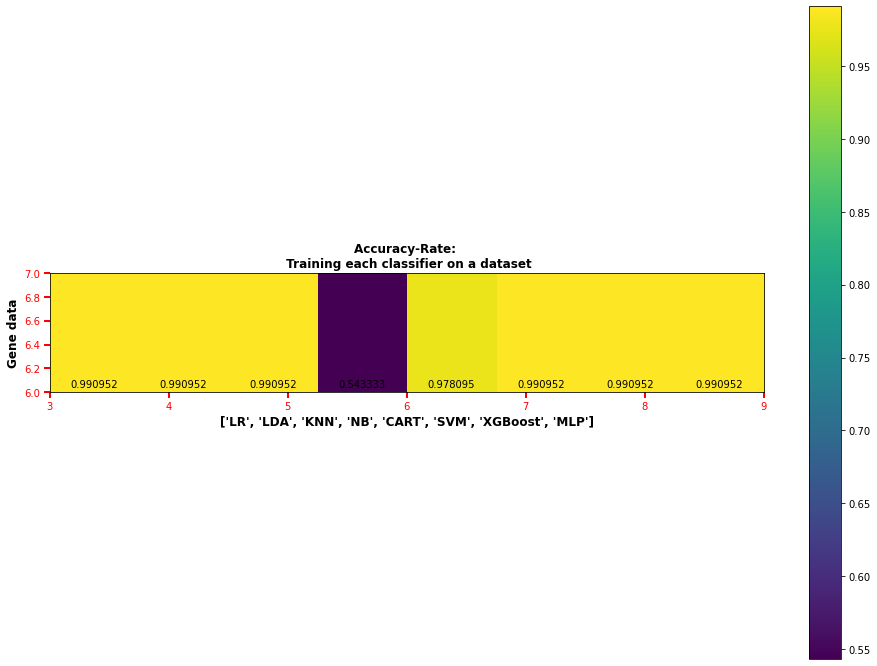

In [47]:
import matplotlib.pyplot as plt
##############################################################################

# Limits for the extent
size = len(models)
x_start = 3.0
x_end = 9.0
y_start = 6.0
y_end = 7.0

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(matrix_accuracy, extent=extent, origin='lower', interpolation='None', cmap='viridis')

# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=1, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = format(matrix_accuracy[y_index, x_index],'.6f')
        text_x = x + jump_x
        text_y = y + jump_y
        ax.text(text_x, text_y, label,  ha='center', va='center')

fig.colorbar(im)

ax.tick_params(direction='out', length=6, width=2, colors='r',
               grid_color='r', grid_alpha=0.5)
ax.set_title('Accuracy-Rate: \n Training each classifier on a dataset', 
             fontsize='large', fontweight='bold')
ax.set_xlabel(modelName, fontsize='large', fontweight='bold')
ax.set_ylabel('Gene data', fontsize='large', fontweight='bold')

print('\n')
print('*' * 80)
print('Plotting Accuracy Matrix (Dataset vs. Classifiers)\n')
plt.show()

**********************************************************************************************
### Select Best Model
**********************************************************************************************

In [48]:
# model_name = "KNN"
# model = KNeighborsClassifier(n_neighbors=grid_result.best_params_['n_neighbors']) 
model_name = models[5][0]
model = models[5][1]
model

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## 5.4 Evaluate Algorithms: Standardize Data

We suspect that the differing distributions of the raw data may be negatively impacting the skill of some of the algorithms. Let's evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of one. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
##############################################################################

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('ScaledMLP', Pipeline([('Scaler', StandardScaler()),('MLP', MLPClassifier(activation='tanh', 
                                    alpha= 0.0001, hidden_layer_sizes= (100,), 
                                    learning_rate= 'adaptive', solver= 'lbfgs'))])))

results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLR: 0.990286 (0.004029)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLDA: 0.990919 (0.003542)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledKNN: 0.990709 (0.003559)
ScaledNB: 0.532305 (0.025500)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledCART: 0.979097 (0.005776)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledSVM: 0.991131 (0.003635)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/module

ScaledMLP: 0.986698 (0.005975)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


**********************************************************************************************
# 6.Save and Load Machine Learning Models
**********************************************************************************************
Finding an accurate machine learning model is not the end of the project. We will discover how to save and load our machine learning model in Python using scikit-learn.
This allows us to save our model to file and load it later in order to make predictions:

1. The importance of serializing models for reuse.
2. How to use pickle to serialize and deserialize machine learning models.
3. How to use Joblib to serialize and deserialize machine learning models.

**********************************************************************************************
## 6.1.Finalize Your Model with pickle
**********************************************************************************************
Pickle is the standard way of serializing objects in Python. You can use the pickle1 operation
to serialize our machine learning algorithms and save the serialized format to a file. Later we
can load this file to deserialize our model and use it to make new predictions. The example
below demonstrates how we can train a logistic regression model on the Pima Indians onset of
diabetes dataset, save the model to file and load it to make predictions on the unseen test set.

In [50]:
# Training the Algorithm on selected model
##############################################################################
# print(models)
# models[2][1]

# model = models[1][1] #SVC(gamma='auto')
# The fit method of SVC class is called to train the 
# algorithm on the training data, which is passed as a parameter to the fit method
model.fit(X_train, Y_train)

from pickle import dump
##############################################################################

#Save Model to disk
filename = model_name + '_finalized_model.sav'
dump(model, open(filename, 'wb'))
print(model_name, ' Model Saved.')

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SVM  Model Saved.


**********************************************************************************************
## 6.2Make Predictions
**********************************************************************************************
The SVM algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation dataset. This will give us an independent final check on the accuracy of the best model. It is important to keep a validation set just in case we made a slip during training, such as overtting to the training set or a data leak. Both will result in an overly optimistic result. We can run the SVM model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [51]:
# load the model from disk
from pickle import load
##############################################################################

loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_validation, Y_validation)
print(result)

# Running the example saves the model to finalized model.sav in your local working
# directory. Load the saved model and evaluating it provides an estimate of accuracy of the model
# on unseen data.

0.9861904761904762


In [52]:
# Making Predictions
print("Prediction on Validation data:\n")
# Y_pred = loaded_model.predict(X_validation)
Y_pred = loaded_model.predict(X_validation)
# Evaluating the Algorithm
# Confusion matrix, precision, recall, and F1 measures are the most commonly 
# used metrics for classification tasks. Scikit-Learn's metrics 
# library contains the classification_report and confusion_matrix methods, 
# which can be readily used to find out the values for these important metrics.
# 

from sklearn.metrics import classification_report, confusion_matrix

##############################################################################


cm = confusion_matrix(Y_validation,Y_pred)
print(cm)
print(classification_report(Y_validation,Y_pred))


# Print out the statistics
# loaded_model.summary()


def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements


# Printing the accuracy
print('Accuracy of ' , model_name, ' Model : ', accuracy(cm)*100, '%')

Prediction on Validation data:

[[2070   11]
 [  18    1]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2081
         1.0       0.08      0.05      0.06        19

    accuracy                           0.99      2100
   macro avg       0.54      0.52      0.53      2100
weighted avg       0.98      0.99      0.98      2100

Accuracy of  SVM  Model :  98.61904761904762 %


In [53]:
# Making Predictions
print("Prediction on Test data:\n")
# Y_pred = loaded_model.predict(X_validation)
Y_pred = loaded_model.predict(X_test)
# Evaluating the Algorithm
# Confusion matrix, precision, recall, and F1 measures are the most commonly 
# used metrics for classification tasks. Scikit-Learn's metrics 
# library contains the classification_report and confusion_matrix methods, 
# which can be readily used to find out the values for these important metrics.
# 

from sklearn.metrics import classification_report, confusion_matrix

##############################################################################


cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))


# Print out the statistics
# loaded_model.summary()


def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements


# Printing the accuracy
print('Accuracy of ' , model_name, ' Model : ', accuracy(cm)*100, '%')

Prediction on Test data:

[[232   0]
 [  2   0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       232
         1.0       0.00      0.00      0.00         2

    accuracy                           0.99       234
   macro avg       0.50      0.50      0.50       234
weighted avg       0.98      0.99      0.99       234

Accuracy of  SVM  Model :  99.14529914529915 %


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**********************************************************************************************
# 7.Machine Learning Algorithm Performance Metrics
**********************************************************************************************
The metrics that you choose to evaluate your machine learning algorithms are very important.
Choice of metrics influences how the performance of machine learning algorithms is measured
and compared. They influence how you weight the importance of different characteristics in
the results and your ultimate choice of which algorithm to choose. In this chapter you will
discover how to select and use different machine learning performance metrics in Python with
scikit-learn. Let's get started.

**Algorithm Evaluation Metrics**

various different algorithm evaluation metrics are demonstrated for both classiffication and regression type machine learning problems.

All recipes evaluate the same algorithms, Logistic Regression for classication and Linear
Regression for the regression problems. A 10-fold cross validation test harness is used to
demonstrate each metric, because this is the most likely scenario you will use when employing
different algorithm evaluation metrics.

**Classification Metrics**
Classication problems are perhaps the most common type of machine learning problem and as
such there are a myriad of metrics that can be used to evaluate predictions for these problems.
In this section we will review how to use the following metrics:

*   Classification Accuracy.
*   Logarithmic Loss.
*   Area Under ROC Curve.
*   Confusion Matrix.
*   Classication Report.


**Regression Metrics**
In this section will review 3 of the most common metrics for evaluating predictions on regression
machine learning problems:

*   Mean Absolute Error.
*   Mean Squared Error.
*   R2.

**********************************************************************************************
## 7.1.Classification Accuracy
**********************************************************************************************
Classification accuracy is the number of correct predictions made as a ratio of all predictions
made. This is the most common evaluation metric for classication problems, it is also the most
misused. It is really only suitable when there are an equal number of observations in each class
(which is rarely the case) and that all predictions and prediction errors are equally important,
which is often not the case. Below is an example of calculating classification accuracy.





In [54]:
# Cross Validation Classification Accuracy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
##############################################################################

seed = 7
kfold = KFold(n_splits=10, random_state=seed)
# model = SVC(gamma='auto')

scoring = 'accuracy'
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

# print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())
print("Accuracy:")
print(results.mean())
print(results.std())

# You can see that the ratio is reported. This can be converted into a percentage by multiplying
# the value by 100, giving an accuracy score of approximately 77% accurate.


# Using the trained network to predict
#Predicting y for X_val
# Y_pred = classifier_gnb.predict(X_validation)
Y_pred = model.predict(X_validation)

# Model Accuracy, how often is the classifier correct?
print("Accuracy using metrics score:",metrics.accuracy_score(Y_validation, Y_pred))

accuracy = model.score(X_validation, Y_validation)
print('\nAccuracy using Classification Score: ',accuracy)

print('\nAccuracy using Classification Report:')
predicted = model.predict(X_validation)
report = classification_report(Y_validation, predicted)
print(report)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/module

Accuracy:
0.9854301032104977
0.005215536699168188
Accuracy using metrics score: 0.9861904761904762

Accuracy using Classification Score:  0.9861904761904762

Accuracy using Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2081
         1.0       0.08      0.05      0.06        19

    accuracy                           0.99      2100
   macro avg       0.54      0.52      0.53      2100
weighted avg       0.98      0.99      0.98      2100



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


**********************************************************************************************
## 7.2.Logarithmic Loss
**********************************************************************************************
Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities
of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure
of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are
rewarded or punished proportionally to the confidence of the prediction. Below is an example
of calculating logloss for Logistic regression predictions on the dataset.

In [55]:
# Cross Validation Classification LogLoss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
##############################################################################

kfold = KFold(n_splits=10, random_state=7)
# model = SVC(gamma='auto', probability=True)
scoring = 'neg_log_loss'
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
# print("Logloss: %.3f (%.3f)") % (results.mean(), results.std())
print("Logloss:")
print(results.mean())
print(results.std())

# Smaller logloss is better with 0 representing a perfect logloss. As mentioned above, the
# measure is inverted to be ascending when using the cross val score() function.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/module

Logloss:
-0.20725066344830245
0.12846704271348122


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


**********************************************************************************************
## 7.3.Area Under ROC Curve
**********************************************************************************************
Area under ROC Curve (or AUC for short) is a performance metric for binary classication
problems. The AUC represents a model's ability to discriminate between positive and negative
classes. An area of 1.0 represents a model that made all predictions perfectly. An area of
0.5 represents a model that is as good as random. ROC can be broken down into sensitivity
and specicity. A binary classication problem is really a trade-off between sensitivity and
specificity.



*   Sensitivity is the true positive rate also called the recall. It is the number of instances
from the positive (rst) class that actually predicted correctly

*   Specicity is also called the true negative rate. Is the number of instances from the
negative (second) class that were actually predicted correctly.



 


In [56]:
''' Remove this comment out if needs to be used
print('\n')
print('*' * 80)
plotRocCurve(X_train,Y_train,model)



# Cross Validation Classification ROC AUC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
##############################################################################

seed = 7
kfold = KFold(n_splits=10, random_state=seed)
# model = SVC(gamma='auto',probability=True)
scoring = 'roc_auc'
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
# print("AUC: %.3f (%.3f)") % (results.mean(), results.std())
print("AUC:")
print(results.mean())
print(results.std())


# You can see the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in
# the predictions
'''

' Remove this comment out if needs to be used\nprint(\'\n\')\nprint(\'*\' * 80)\nplotRocCurve(X_train,Y_train,model)\n\n\n\n# Cross Validation Classification ROC AUC\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\n##############################################################################\n\nseed = 7\nkfold = KFold(n_splits=10, random_state=seed)\n# model = SVC(gamma=\'auto\',probability=True)\nscoring = \'roc_auc\'\nresults = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)\n# print("AUC: %.3f (%.3f)") % (results.mean(), results.std())\nprint("AUC:")\nprint(results.mean())\nprint(results.std())\n\n\n# You can see the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in\n# the predictions\n'

**********************************************************************************************
## 7.4.Confusion Matrix
**********************************************************************************************
The confusion matrix is a handy presentation of the accuracy of a model with two or more
classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The
cells of the table are the number of predictions made by a machine learning algorithm. For
example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have
been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction = 0 and
actual = 0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0
and actual = 1. And so on. Below is an example of calculating a confusion matrix for a set of
predictions by a Logistic Regression on the Pima Indians onset of diabetes dataset.

In [57]:
# Cross Validation Classification Confusion Matrix
from sklearn.metrics import confusion_matrix
##############################################################################

seed = 7
# model = SVC(gamma='auto')
# model.fit(X_train, Y_train)

predicted = model.predict(X_validation)
matrix = confusion_matrix(Y_validation, predicted)
print(matrix)


def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements


# Printing the accuracy
print('Accuracy of ', model_name , accuracy(matrix)*100, '%')

# Although the array is printed without headings, you can see that the majority of the
# predictions fall on the diagonal line of the matrix (which are correct predictions).

[[2070   11]
 [  18    1]]
Accuracy of  SVM 98.61904761904762 %


**********************************************************************************************
## 7.5.Classication Report
**********************************************************************************************
The scikit-learn library provides a convenience report when working on classication prob-lems to give you a quick idea of the accuracy of a model using a number of measures. The
classification report() function displays the precision, recall, F1-score and support for each
class. The example below demonstrates the report on the binary classication problem.

In [58]:
# Cross Validation Classification Report
from sklearn.metrics import classification_report
##############################################################################

# seed = 50

# model = SVC(gamma='auto')
# model.fit(X_train, Y_train)
predicted = model.predict(X_validation)
report = classification_report(Y_validation, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2081
         1.0       0.08      0.05      0.06        19

    accuracy                           0.99      2100
   macro avg       0.54      0.52      0.53      2100
weighted avg       0.98      0.99      0.98      2100



**********************************************************************************************
# 8.Performance Improvement
**********************************************************************************************

**********************************************************************************************
## 8.A. Improve Performance with Ensembles
**********************************************************************************************

Ensembles can give you a boost in accuracy on your dataset. In this chapter you will discover
how you can create some of the most powerful types of ensembles in Python using scikit-learn.
This lesson will step you through Boosting, Bagging and Majority Voting and show you how you
can continue to ratchet up the accuracy of the models on your own datasets. After completing
this lesson you will know:
1. How to use bagging ensemble methods such as bagged decision trees, random forest and
extra trees.
2. How to use boosting ensemble methods such as AdaBoost and stochastic gradient boosting.
3. How to use voting ensemble methods to combine the predictions from multiple algorithms.
Let's get started.


**Combine Models Into Ensemble Predictions**

The three most popular methods for combining the predictions from dierent models are:

 **1-Bagging**. Building multiple models (typically of the same type) from dierent subsamples of the training dataset.
 

 **2-Boosting**. Building multiple models (typically of the same type) each of which learns to x the prediction errors of a prior model in the sequence of models.

 **3-Voting**. Building multiple models (typically of diering types) and simple statistics (like calculating the mean) are used to combine predictions.
Each ensemble algorithm is demonstrated using 10-fold cross validation and the classication accuracy performance metric.

### 8.A.1 Bagging Algorithms

Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset
(with replacement) and training a model for each sample. The nal output prediction is averaged
across the predictions of all of the sub-models. The three bagging models covered in this section
are as follows:

1.   Bagged Decision Trees.
2.   Random Forest.
3.   Extra Trees.


**********************************************************************************************
#### 8.A.1.1 Bagged Decision Trees
**********************************************************************************************

Bagging performs best with algorithms that have high variance. A popular example are
decision trees, often constructed without pruning. In the example below is an example
of using the BaggingClassifier with the Classication and Regression Trees algorithm
(DecisionTreeClassifier1). A total of 100 trees are created.

In [59]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 150
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())#Running the example, we get a robust estimate of model accuracy.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.990947666195191


**********************************************************************************************
#### 8.A.1.2 Random Forest
**********************************************************************************************

Random Forests is an extension of bagged decision trees. Samples of the training dataset are
taken with replacement, but the trees are constructed in a way that reduces the correlation
between individual classiers. Specically, rather than greedily choosing the best split point in
the construction of each tree, only a random subset of features are considered for each split. You
can construct a Random Forest model for classication using the RandomForestClassifier
class2. The example below demonstrates using Random Forest for classication with 100 trees
and split points chosen from a random selection of 3 features.

In [60]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]
num_trees = 500
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) #Running the example provides a mean estimate of classification accuracy.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.991089108910891


**********************************************************************************************
#### 8.A.1.3Extra Trees
**********************************************************************************************
Extra Trees are another modication of bagging where random trees are constructed from
samples of the training dataset. You can construct an Extra Trees model for classication using
the ExtraTreesClassifier class3. The example below provides a demonstration of extra trees
with the number of trees set to 100 and splits chosen from 7 random features.

In [61]:
# Extra Trees Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]
num_trees = 100
max_features = 7
seed = 50
kfold = KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.991089108910891


**********************************************************************************************
### 8.A.2 Boosting Algorithms
**********************************************************************************************

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes
of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a nal
output prediction. The two most common boosting ensemble machine learning algorithms are:

 1.AdaBoost.

 2.Stochastic Gradient Boosting.

**********************************************************************************************
#### 8.A.2.1AdaBoost
**********************************************************************************************
AdaBoost was perhaps the rst successful boosting ensemble algorithm. It generally works
by weighting instances in the dataset by how easy or dicult they are to classify, allowing
the algorithm to pay or less attention to them in the construction of subsequent models. You
can construct an AdaBoost model for classication using the AdaBoostClassifier class4. The
example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost
algorithm.


In [62]:
# AdaBoost Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]
num_trees = 30
seed=50
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) #Running the example provides a mean estimate of classification accuracy.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9903818953323903


**********************************************************************************************
#### 8.A.2.2 Stochastic Gradient Boosting
**********************************************************************************************
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most
sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of
the best techniques available for improving performance via ensembles. You can construct a
Gradient Boosting model for classication using the GradientBoostingClassifier class5. The
example below demonstrates Stochastic Gradient Boosting for classication with 100 trees.

In [63]:
# Stochastic Gradient Boosting Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) #Running the example provides a mean estimate of classification accuracy.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9898161244695898


**********************************************************************************************
### 8.A.3 Voting Ensemble
**********************************************************************************************
Voting is one of the simplest ways of combining the predictions from multiple machine learning
algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classier can then be used to wrap your models and average the predictions of the
sub-models when asked to make predictions for new data. The predictions of the sub-models can
be weighted, but specifying the weights for classiers manually or even heuristically is dicult.
More advanced methods can learn how to best weight the predictions from sub-models, but this
is called stacking (stacked aggregation) and is currently not provided in scikit-learn.
You can create a voting ensemble model for classication using the VotingClassifier
class6. The code below provides an example of combining the predictions of logistic regression,
classication and regression trees and support vector machines together for a classication
problem.

In [64]:
# Voting Ensemble for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = LogisticRegression(solver='lbfgs', multi_class='auto')
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(gamma='auto')
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean()) #Running the example provides a mean estimate of classification accuracy.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.991089108910891


Summary
In this chapter you discovered ensemble machine learning algorithms for improving the perfor-
mance of models on your problems. You learned about:

 Bagging Ensembles including Bagged Decision Trees, Random Forest and Extra Trees.

 Boosting Ensembles including AdaBoost and Stochastic Gradient Boosting.

 Voting Ensembles for averaging the predictions for any arbitrary models.

**********************************************************************************************
## 8.B. Improve Performance with Algorithm Tuning
**********************************************************************************************

Machine learning models are parameterized so that their behavior can be tuned for a given
problem. Models can have many parameters and nding the best combination of parameters can
be treated as a search problem. In this chapter you will discover how to tune the parameters of
machine learning algorithms in Python using the scikit-learn. After completing this lesson you
will know:
1. The importance of algorithm parameter tuning to improve algorithm performance.
2. How to use a grid search algorithm tuning strategy.
3. How to use a random search algorithm tuning strategy.
Let's get started.

**Machine Learning Algorithm Parameters**
Algorithm tuning is a nal step in the process of applied machine learning before nalizing your
model. It is sometimes called hyperparameter optimization where the algorithm parameters
are referred to as hyperparameters, whereas the coecients found by the machine learning
algorithm itself are referred to as parameters. Optimization suggests the search-nature of the
problem. Phrased as a search problem, you can use dierent search strategies to nd a good and
robust parameter or set of parameters for an algorithm on a given problem. Python scikit-learn
provides two simple methods for algorithm parameter tuning:
*   Grid Search Parameter Tuning.
*   Random Search Parameter Tuning.

**********************************************************************************************
### 8.B.1. Grid Search Parameter Tuning
**********************************************************************************************
Grid search is an approach to parameter tuning that will methodically build and evaluate a
model for each combination of algorithm parameters specified in a grid. You can perform a grid
search using the GridSearchCV class1. The example below evaluates different alpha values for
the Ridge Regression algorithm on the standard dataset. This is a one-dimensional grid search.

In [65]:
''' Remove this comment out if needs to be used
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
#Running the example lists out the optimal score achieved and the set of parameters in the
# grid that achieved that score. In this case the alpha value of 1.0.
'''

' Remove this comment out if needs to be used\n# Grid Search for Algorithm Tuning\nimport numpy\nfrom pandas import read_csv\nfrom sklearn.linear_model import Ridge\nfrom sklearn.model_selection import GridSearchCV\n##############################################################################\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\nX = array[:,0:no_of_attrib]\nY = array[:,no_of_attrib]\nalphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])\nparam_grid = dict(alpha=alphas)\nmodel = Ridge()\ngrid = GridSearchCV(estimator=model, param_grid=param_grid)\ngrid.fit(X, Y)\nprint(grid.best_score_)\nprint(grid.best_estimator_.alpha)\n#Running the example lists out the optimal score achieved and the set of parameters in the\n# grid that achieved that score. In this case the alpha value of 1.0.\n'

**********************************************************************************************
### 8.B.2. Random Search Parameter Tuning
**********************************************************************************************
Random search is an approach to parameter tuning that will sample algorithm parameters from
a random distribution (i.e. uniform) for a xed number of iterations. A model is constructed
and evaluated for each combination of parameters chosen. You can perform a random search
for algorithm parameters using the RandomizedSearchCV class2. The example below evaluates
dierent random alpha values between 0 and 1 for the Ridge Regression algorithm on the
standard diabetes dataset. A total of 100 iterations are performed with uniformly random alpha
values selected in the range between 0 and 1 (the range that alpha values can take).

In [66]:
''' Remove this comment out if needs to be used
# Randomized for Algorithm Tuning
import numpy
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
##############################################################################
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values
X = array[:,0:no_of_attrib]
Y = array[:,no_of_attrib]

param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)
# Running the example produces results much like those in the grid search example above. An
# optimal alpha value near 1.0 is discovered.
'''

" Remove this comment out if needs to be used\n# Randomized for Algorithm Tuning\nimport numpy\nfrom scipy.stats import uniform\nfrom sklearn.linear_model import Ridge\nfrom sklearn.model_selection import RandomizedSearchCV\n##############################################################################\nno_of_coulmns = data_to_use.shape[1]\nno_of_attrib = no_of_coulmns -1\n\narray = data_to_use.values\nX = array[:,0:no_of_attrib]\nY = array[:,no_of_attrib]\n\nparam_grid = {'alpha': uniform()}\nmodel = Ridge()\nrsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,\nrandom_state=7)\nrsearch.fit(X, Y)\nprint(rsearch.best_score_)\nprint(rsearch.best_estimator_.alpha)\n# Running the example produces results much like those in the grid search example above. An\n# optimal alpha value near 1.0 is discovered.\n"

# Covolutional Neural Network - Keras sequential model:

## Building and Training Our First Neural Network



We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [67]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers: Hidden layer 1: 30 neurons, ReLU activation Hidden layer 2: 30 neurons, ReLU activation Output Layer: 1 neuron, Sigmoid activation

In [68]:
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

# model = Sequential([
#     Dense(32, activation='relu', input_shape=(no_of_attrib,)),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid'),
# ])

model = Sequential([
    Dense(12, activation='relu', input_shape=(no_of_attrib,)),
    Dense(1, activation='sigmoid'),
])


# Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.

# We have our first layer as a dense layer with 32 neurons, ReLU activation and the input 
# shape is 10 since we have 10 input features. Note that ‘Dense’ refers to a fully-connected layer, 
# which is what we will be using.

# Our second layer is also a dense layer with 32 neurons, ReLU activation. Note that we do not
#  have to describe the input shape since Keras can infer from the output of our first layer.

# Our third layer is a dense layer with 1 neuron, sigmoid activation.
# And just like that, we have written our model architecture (template) in code!

In [69]:
# Hyperparameters
epochs_ = 100
num_classes = 2
batch_size_ = 32
learning_rate = 0.01

*Now* that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by 

   *   Telling it what algorithm you want to use to do the optimization(we'll use stochastic gradient descent)

*   Telling it what loss function to use (for binary classification, we will use binary cross entropy)
*   Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)



In [70]:
from keras import optimizers

# create a stochastic gradient descent optimizer

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='mean_squared_error', optimizer=sgd)

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# sgd’ refers to stochastic gradient descent (over here, it refers to mini-batch gradient descent)
# The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
# Lastly, we want to track accuracy on top of the loss function. Now once we’ve run that cell, we are ready to train!

Before training a model, we need to configure the learning process, which is done via the compile method. It receives three arguments:
An optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class. See: optimizers. A loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. See: losses. A list of metrics. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.

In [71]:

''' Remove this comment out if needs to be used
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
'''

" Remove this comment out if needs to be used\n# For a multi-class classification problem\nmodel.compile(optimizer='rmsprop',\n              loss='categorical_crossentropy',\n              metrics=['accuracy'])\n"

In [72]:
# This is formatted as code


In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                276       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify: what data we are training on, which is X_train and Y_train the size of our mini-batch how long we want to train it for (epochs) what our validation data is so that the model will tell us how we are doing on the validation data at each point. This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [74]:
hist = model.fit(X_train, Y_train,
                 batch_size=batch_size_, epochs=epochs_,
          validation_data=(X_validation, Y_validation))

model_name = "CNN"

Train on 4736 samples, validate on 2100 samples
Epoch 1/100
4736/4736 [==============================] - 1s 110us/step - loss: 0.1177 - accuracy: 0.9911 - val_loss: 0.0509 - val_accuracy: 0.9910
Epoch 2/100
4736/4736 [==============================] - 0s 42us/step - loss: 0.0497 - accuracy: 0.9911 - val_loss: 0.0503 - val_accuracy: 0.9910
Epoch 3/100
4736/4736 [==============================] - 0s 42us/step - loss: 0.0496 - accuracy: 0.9911 - val_loss: 0.0502 - val_accuracy: 0.9910
Epoch 4/100
4736/4736 [==============================] - 0s 44us/step - loss: 0.0496 - accuracy: 0.9911 - val_loss: 0.0502 - val_accuracy: 0.9910
Epoch 5/100
4736/4736 [==============================] - 0s 43us/step - loss: 0.0496 - accuracy: 0.9911 - val_loss: 0.0502 - val_accuracy: 0.9910
Epoch 6/100
4736/4736 [==============================] - 0s 42us/step - loss: 0.0495 - accuracy: 0.9911 - val_loss: 0.0502 - val_accuracy: 0.9910
Epoch 7/100
4736/4736 [==============================] - 0s 41us/step - los

In [75]:
# This is formatted as code


In [76]:
model.evaluate(X_test, Y_test)[1]

234/234 [==============================] - 0s 34us/step


0.9914529919624329

In [77]:
## Visualizing Loss and Accuracy

We want to visualize the training loss and the validation loss like this:

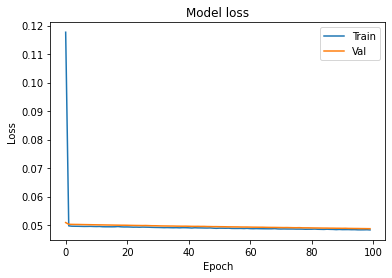

In [78]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

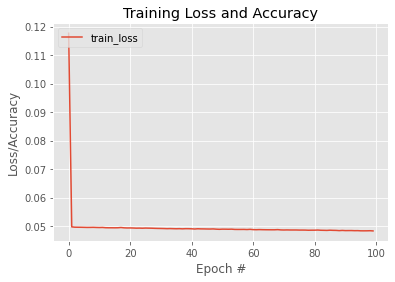

In [79]:
plt.style.use("ggplot")
plt.figure()
N = epochs_ 
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [80]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [81]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       232
         1.0       0.00      0.00      0.00         2

    accuracy                           0.99       234
   macro avg       0.50      0.50      0.50       234
weighted avg       0.98      0.99      0.99       234



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Adding Regularization to our Neural Network

We'll train a model which will overfit, which we call 


Model 2. This might take a few minutes.

In [82]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(no_of_attrib,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=batch_size_, epochs=epochs_,
          validation_data=(X_validation, Y_validation))

Train on 4736 samples, validate on 2100 samples
Epoch 1/100
4736/4736 [==============================] - 7s 2ms/step - loss: 0.0664 - accuracy: 0.9911 - val_loss: 0.0677 - val_accuracy: 0.9910
Epoch 2/100
4736/4736 [==============================] - 7s 2ms/step - loss: 0.0546 - accuracy: 0.9911 - val_loss: 0.0541 - val_accuracy: 0.9910
Epoch 3/100
4736/4736 [==============================] - 7s 2ms/step - loss: 0.0546 - accuracy: 0.9911 - val_loss: 0.0483 - val_accuracy: 0.9910
Epoch 4/100
4736/4736 [==============================] - 7s 2ms/step - loss: 0.0544 - accuracy: 0.9911 - val_loss: 0.0475 - val_accuracy: 0.9910
Epoch 5/100
4736/4736 [==============================] - 7s 2ms/step - loss: 0.0511 - accuracy: 0.9911 - val_loss: 0.0481 - val_accuracy: 0.9910
Epoch 6/100
4736/4736 [==============================] - 7s 2ms/step - loss: 0.0507 - accuracy: 0.9911 - val_loss: 0.0472 - val_accuracy: 0.9910
Epoch 7/100
4736/4736 [==============================] - 7s 2ms/step - loss: 0.052

Evaluating our data on the test set :

In [83]:
model_2.evaluate(X_test, Y_test)[1]

234/234 [==============================] - 0s 240us/step


0.9914529919624329

Let's do the same visualization to see what overfitting looks like in terms of the loss and accuracy.

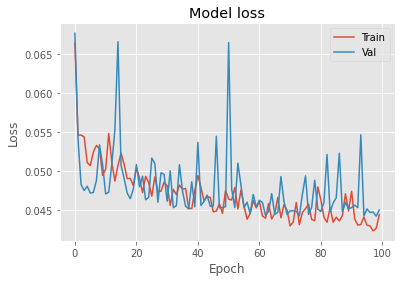

In [84]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

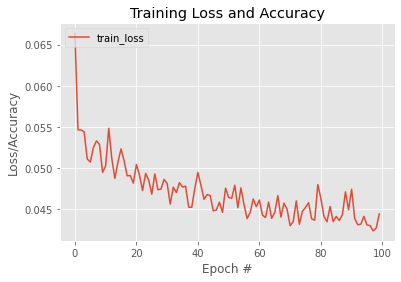

In [85]:
plt.style.use("ggplot")
plt.figure()
N = epochs_ 
plt.plot(np.arange(0, N), hist_2.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), hist_2.history["acc"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

To address the overfitting we see in Model 2, we'll 


incorporate L2 regularization and dropout in our third model here (Model 3).

In [86]:
from keras.layers import Dropout
from keras import regularizers

In [87]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(no_of_attrib,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [88]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=batch_size_, epochs=epochs_,
          validation_data=(X_validation, Y_validation))

Train on 4736 samples, validate on 2100 samples
Epoch 1/100
4736/4736 [==============================] - 10s 2ms/step - loss: 3.4971 - accuracy: 0.9854 - val_loss: 0.1198 - val_accuracy: 0.9910
Epoch 2/100
4736/4736 [==============================] - 9s 2ms/step - loss: 0.0945 - accuracy: 0.9911 - val_loss: 0.0827 - val_accuracy: 0.9910
Epoch 3/100
4736/4736 [==============================] - 9s 2ms/step - loss: 0.0821 - accuracy: 0.9911 - val_loss: 0.0735 - val_accuracy: 0.9910
Epoch 4/100
4736/4736 [==============================] - 10s 2ms/step - loss: 0.0712 - accuracy: 0.9911 - val_loss: 0.0731 - val_accuracy: 0.9910
Epoch 5/100
4736/4736 [==============================] - 10s 2ms/step - loss: 0.0677 - accuracy: 0.9911 - val_loss: 0.0650 - val_accuracy: 0.9910
Epoch 6/100
4736/4736 [==============================] - 10s 2ms/step - loss: 0.0643 - accuracy: 0.9911 - val_loss: 0.0650 - val_accuracy: 0.9910
Epoch 7/100
4736/4736 [==============================] - 10s 2ms/step - loss: 

Evaluating our data on the test set :

In [89]:
model_3.evaluate(X_test, Y_test)[1]

234/234 [==============================] - 0s 322us/step


0.9914529919624329

In [90]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

# Making Predictions
print("Prediction on Test data:\n")
from sklearn.metrics import classification_report, confusion_matrix

##############################################################################
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))


Prediction on Test data:

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       232
         1.0       0.00      0.00      0.00         2

    accuracy                           0.99       234
   macro avg       0.50      0.50      0.50       234
weighted avg       0.98      0.99      0.99       234



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

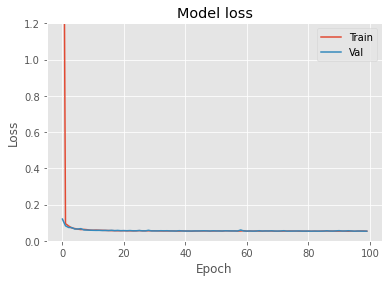

In [91]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

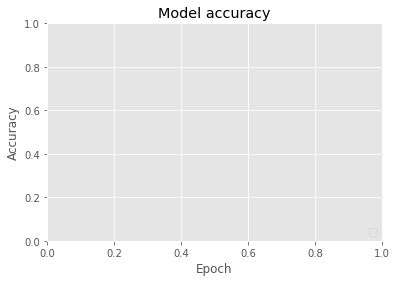

In [92]:
#plt.plot(hist_3.history['acc'])
#plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

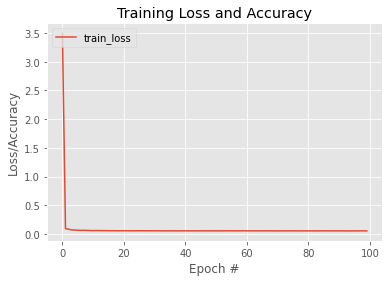

In [93]:
plt.style.use("ggplot")
plt.figure()
N = epochs_ 
plt.plot(np.arange(0, N), hist_3.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), hist_3.history["acc"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

As compared to Model 2, you should see that there's less overfitting!

## Grid Search HyperParametersTuning



In [94]:

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm
##############################################################

Tune Batch Size and Number of Epochs

In [95]:
# ''' Remove this comment out if needs to be used
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
##############################################################
# load dataset
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

# X = array[:,0:no_of_attrib]
# Y = array[:,no_of_attrib]

X = X_train
Y = Y_train

print(type(X)) # numpy.ndarray
input_dim = X.shape[1] # number of columns
print(input_dim) # 23


# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=no_of_attrib, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
###############################################################
# '''

<class 'numpy.ndarray'>
22
Best: 0.991131 using {'batch_size': 10, 'epochs': 10}
0.991131 (0.001037) with: {'batch_size': 10, 'epochs': 10}
0.991131 (0.001037) with: {'batch_size': 10, 'epochs': 50}
0.991131 (0.001037) with: {'batch_size': 10, 'epochs': 100}
0.991131 (0.001037) with: {'batch_size': 20, 'epochs': 10}
0.991131 (0.001037) with: {'batch_size': 20, 'epochs': 50}
0.991131 (0.001037) with: {'batch_size': 20, 'epochs': 100}
0.991131 (0.001037) with: {'batch_size': 40, 'epochs': 10}
0.991131 (0.001037) with: {'batch_size': 40, 'epochs': 50}
0.991131 (0.001037) with: {'batch_size': 40, 'epochs': 100}
0.991131 (0.001037) with: {'batch_size': 60, 'epochs': 10}
0.991131 (0.001037) with: {'batch_size': 60, 'epochs': 50}
0.991131 (0.001037) with: {'batch_size': 60, 'epochs': 100}
0.991131 (0.001037) with: {'batch_size': 80, 'epochs': 10}
0.991131 (0.001037) with: {'batch_size': 80, 'epochs': 50}
0.991131 (0.001037) with: {'batch_size': 80, 'epochs': 100}
0.991131 (0.001037) with: {'b

Tune the Training Optimization Algorithm

In [96]:
# ''' Remove this comment out if needs to be used
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
##############################################################
# load dataset
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

# X = array[:,0:no_of_attrib]
# Y = array[:,no_of_attrib]

X = X_train
Y = Y_train

print(type(X)) # numpy.ndarray
input_dim = X.shape[1] # number of columns
print(input_dim) # 23


# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=no_of_attrib, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
###############################################################
# '''

<class 'numpy.ndarray'>
22
Best: 0.991131 using {'optimizer': 'SGD'}
0.991131 (0.001037) with: {'optimizer': 'SGD'}
0.991131 (0.001037) with: {'optimizer': 'RMSprop'}
0.991131 (0.001037) with: {'optimizer': 'Adagrad'}
0.991131 (0.001037) with: {'optimizer': 'Adadelta'}
0.991131 (0.001037) with: {'optimizer': 'Adam'}
0.991131 (0.001037) with: {'optimizer': 'Adamax'}
0.991131 (0.001037) with: {'optimizer': 'Nadam'}


Tune Learning Rate and Momentum

In [97]:
# ''' Remove this comment out if needs to be used
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
##############################################################
# load dataset
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

# X = array[:,0:no_of_attrib]
# Y = array[:,no_of_attrib]


print(type(X)) # numpy.ndarray
input_dim = X.shape[1] # number of columns
print(input_dim) # 23


# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=no_of_attrib, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	optimizer = SGD(lr=learn_rate, momentum=momentum)
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# use verbose=0 if you do not want to see progress

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
###############################################################
# '''

<class 'numpy.ndarray'>
22
Best: 0.991131 using {'learn_rate': 0.001, 'momentum': 0.0}
0.991131 (0.001037) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.991131 (0.001037) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.991131 (0.001037) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.991131 (0.001037) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.991131 (0.001037) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.991131 (0.001037) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.991131 (0.001037) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.991131 (0.001037) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.991131 (0.001037) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.991131 (0.001037) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.991131 (0.001037) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.991131 (0.001037) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.991131 (0.001037) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.991131 (0.001037) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.991131 (0.0

Tune Network Weight Initialization

In [98]:
# ''' Remove this comment out if needs to be used
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
##############################################################
# load dataset
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

# X = array[:,0:no_of_attrib]
# Y = array[:,no_of_attrib]

X = X_train
Y = Y_train

print(type(X)) # numpy.ndarray
input_dim = X.shape[1] # number of columns
print(input_dim) # 23


# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=no_of_attrib, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

  
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
###############################################################
# '''

<class 'numpy.ndarray'>
22
Best: 0.991131 using {'init_mode': 'uniform'}
0.991131 (0.001037) with: {'init_mode': 'uniform'}
0.991131 (0.001037) with: {'init_mode': 'lecun_uniform'}
0.991131 (0.001037) with: {'init_mode': 'normal'}
0.991131 (0.001037) with: {'init_mode': 'zero'}
0.991131 (0.001037) with: {'init_mode': 'glorot_normal'}
0.991131 (0.001037) with: {'init_mode': 'glorot_uniform'}
0.991131 (0.001037) with: {'init_mode': 'he_normal'}
0.991131 (0.001037) with: {'init_mode': 'he_uniform'}


Tune the Neuron Activation Function

In [99]:
# ''' Remove this comment out if needs to be used
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
##############################################################
# load dataset
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

# X = array[:,0:no_of_attrib]
# Y = array[:,no_of_attrib]

X = X_train
Y = Y_train

print(type(X)) # numpy.ndarray
input_dim = X.shape[1] # number of columns
print(input_dim) # 23


# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=no_of_attrib, kernel_initializer='uniform', activation=activation))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

  
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
###############################################################
# '''

<class 'numpy.ndarray'>
22
Best: 0.991131 using {'activation': 'softmax'}
0.991131 (0.001037) with: {'activation': 'softmax'}
0.991131 (0.001037) with: {'activation': 'softplus'}
0.990709 (0.001196) with: {'activation': 'softsign'}
0.991131 (0.001037) with: {'activation': 'relu'}
0.990709 (0.001196) with: {'activation': 'tanh'}
0.991131 (0.001037) with: {'activation': 'sigmoid'}
0.991131 (0.001037) with: {'activation': 'hard_sigmoid'}
0.991131 (0.001037) with: {'activation': 'linear'}


Tune Dropout Regularization

In [100]:
# ''' Remove this comment out if needs to be used
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
##############################################################
# load dataset
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

# X = array[:,0:no_of_attrib]
# Y = array[:,no_of_attrib]

X = X_train
Y = Y_train

print(type(X)) # numpy.ndarray
input_dim = X.shape[1] # number of columns
print(input_dim) # 23


# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=no_of_attrib, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

  
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
###############################################################
# '''

<class 'numpy.ndarray'>
22


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.991131 using {'dropout_rate': 0.0, 'weight_constraint': 1}
0.991131 (0.001037) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.991131 (0.001037) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.991131 (0.001037) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.991131 (0.001037) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.991131 (0.001037) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.991131 (0.001037) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.991131 (0.001037) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.991131 (0.001037) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.991131 (0.001037) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.991131 (0.001037) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.991131 (0.001037) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.991131 (0.001037) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.991131 (0.001037) with: {'dropout_rate': 0.2, 'weight_constraint': 

Tune the Number of Neurons in the Hidden Layer

In [101]:
# ''' Remove this comment out if needs to be used
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
##############################################################
# load dataset
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

# X = array[:,0:no_of_attrib]
# Y = array[:,no_of_attrib]

X = X_train
Y = Y_train

print(type(X)) # numpy.ndarray
input_dim = X.shape[1] # number of columns
print(input_dim) # 23


# Function to create model, required for KerasClassifier
def create_model(neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=no_of_attrib, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

  
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
###############################################################
# '''

<class 'numpy.ndarray'>
22
Best: 0.991131 using {'neurons': 1}
0.991131 (0.001037) with: {'neurons': 1}
0.991131 (0.001037) with: {'neurons': 5}
0.991131 (0.001037) with: {'neurons': 10}
0.991131 (0.001037) with: {'neurons': 15}
0.991131 (0.001037) with: {'neurons': 20}
0.991131 (0.001037) with: {'neurons': 25}
0.991131 (0.001037) with: {'neurons': 30}


## Select Best Model

In [102]:
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
##############################################################
# load dataset
no_of_coulmns = data_to_use.shape[1]
no_of_attrib = no_of_coulmns -1

array = data_to_use.values

# X = array[:,0:no_of_attrib]
# Y = array[:,no_of_attrib]

X = X_train
Y = Y_train

print(type(X)) # numpy.ndarray
input_dim = X.shape[1] # number of columns
print(input_dim) # 23


# Function to create model, required for KerasClassifier
# def create_model_Best(neurons=25):
# 	# create model
# 	model = Sequential()
# 	model.add(Dense(neurons, input_dim=no_of_attrib, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
# 	model.add(Dropout(0.2))
# 	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# 	# Compile model
# 	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 	return model


model_best = Sequential([
    Dense(25, input_dim=no_of_attrib, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)),                  
    # model.add(Dropout(0.2))
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

model_best.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_best.summary()

 

<class 'numpy.ndarray'>
22
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 25)                575       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 26        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Hyperparameters
epochs_ = 100
batch_size_ = 80

hist = model_best.fit(X_train, Y_train,
                 batch_size=batch_size_, epochs=epochs_,
          validation_data=(X_validation, Y_validation))

model_name = "CNN"

Train on 4736 samples, validate on 2100 samples
Epoch 1/100
4736/4736 [==============================] - 0s 36us/step - loss: 0.5835 - accuracy: 0.9909 - val_loss: 0.4017 - val_accuracy: 0.9910
Epoch 2/100
4736/4736 [==============================] - 0s 20us/step - loss: 0.2344 - accuracy: 0.9911 - val_loss: 0.1188 - val_accuracy: 0.9910
Epoch 3/100
4736/4736 [==============================] - 0s 18us/step - loss: 0.0848 - accuracy: 0.9911 - val_loss: 0.0646 - val_accuracy: 0.9910
Epoch 4/100
4736/4736 [==============================] - 0s 18us/step - loss: 0.0581 - accuracy: 0.9911 - val_loss: 0.0537 - val_accuracy: 0.9910
Epoch 5/100
4736/4736 [==============================] - 0s 19us/step - loss: 0.0513 - accuracy: 0.9911 - val_loss: 0.0502 - val_accuracy: 0.9910
Epoch 6/100
4736/4736 [==============================] - 0s 19us/step - loss: 0.0491 - accuracy: 0.9911 - val_loss: 0.0490 - val_accuracy: 0.9910
Epoch 7/100
4736/4736 [==============================] - 0s 19us/step - loss

In [104]:
model_best.evaluate(X_test, Y_test)[1]

234/234 [==============================] - 0s 32us/step


0.9914529919624329

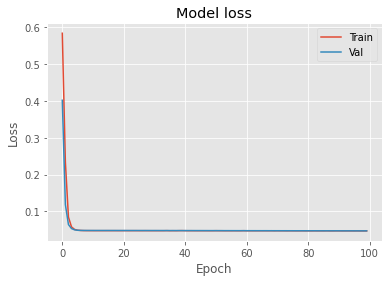

KeyError: ignored

In [105]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


plt.style.use("ggplot")
plt.figure()
N = epochs_ 
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["acc"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")